# Caracterización demográfica.

In [1]:
# Libraries
library (ggplot2)
#install.packages("scatterplot3d", repos='https://cloud.r-project.org')
library(scatterplot3d)
#install.packages("rpart", repos='https://cloud.r-project.org')
library(rpart)
# install.packages("party", repos='https://cloud.r-project.org')
library(party)


getmode= function(v){
    uniquev=unique(v)
    uniquev[which.max(tabulate(match(v,uniquev)))]
}

Warning message:
: package 'scatterplot3d' was built under R version 3.3.2Warning message:
: package 'rpart' was built under R version 3.3.2Warning message:
: package 'party' was built under R version 3.3.2Loading required package: grid
Loading required package: mvtnorm
Warning message:
: package 'mvtnorm' was built under R version 3.3.2Loading required package: modeltools
Warning message:
: package 'modeltools' was built under R version 3.3.2Loading required package: stats4
Loading required package: strucchange
Warning message:
: package 'strucchange' was built under R version 3.3.2Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
: package 'sandwich' was built under R version 3.3.2

## Carga test files

In [2]:
test1=read.csv(file="2016-10-29_DatosEncuesta.csv",header = T, fileEncoding = "UTF-8")
rownames(test1)=test1[,1]
test1=test1[,-1]
print(ncol(test1))

[1] 109


## Variables Priorizadas

In [3]:
test_full=test1
var_import=c(3,4,8,32,34,35,38,39,41,42,43,53,61,62,68,70,71,72,73,75,105,106,107)
test2=test1[,var_import]
colnames(test2)

########
test1=test2

[1] "edad"           "sexo"           "poblacin_esp"   "lug_trabajo"   
 [5] "ing_mensual"    "grupo_fliar"    "profesin_padre" "educacin_padre"
 [9] "profesin_madre" "educacin_madre" "educa_pareja"   "prof_mayores1" 
[13] "profesin_hnos2" "profesin_hnos3" "otra_carrera"   "mot_calidad"   
[17] "mot_costo"      "mot_beneficio"  "mot_gusto"      "mot_personal"  
[21] "costos"         "calidad"        "modalidad"

In [4]:
### Definir la cantidad de grupos(k)
k_groups=3

# Test3 preprocesamiento

- Normalizar edad
- Transformar en variables dummy (2:15)
- Trabajar con distancia euclideana

### Transformar variables en factores

In [5]:
test3=test2
for (i in 16:ncol(test3)){
    test3[test3[,i]==2,i]=0
}
#test3[,16:ncol(test3)]

In [6]:
test3$sexo=factor(test3$sexo,levels=c(1,2),labels = c("Femenino","Masculino"))

test3$poblacin_esp = factor (test3$poblacin_esp,levels=c(0,1,2,3,4,5,6,7),labels=c(
    "No pertenece","Madre cabeza de familia","Padre cabeza de familia","Indígena","Reinsertado","Desplazado","Adulto Mayor","LGBTI"
))

test3$lug_trabajo = factor (test3$lug_trabajo,levels=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),labels=c(
    "No aplica","Servicios Generales","ETB","Microempresa","Colegio","Universidad","ISIVEN ANDINA","Independiente","Banco","Fiscalía","Constructora","Consultora Recursos Humanos","Hacienda","Acueducto","DERALAM SAS"
))

test3$ing_mensual = factor (test3$ing_mensual,levels=c(0,1,2,3,4,5,6,7),labels=c(
    "No aplica","Menos de un salario mínimo","De 1 a 2 SMMLV","De 2 a 3 SMMLV","De 4 a 5 SMMLV","De 5 a 6 SMMLV","De 6 a 7 SMMLV","Más de 7 SMMLV"
))

test3$grupo_fliar = factor (test3$grupo_fliar,
                  levels = c(1,2,3,4,5,6,7,8),
                  labels=c("Padres","Pareja","Hijos","Abuelos","Solo","Pareja e Hijos","Padres e hijos","Hermanos")
                 )

test3$profesin_padre = factor (test3$profesin_padre,
                 levels = c(0,1,2,3,4,5,6,7,8),
                 labels=c("No aplica","Administrador Agroindustrial","Artes escénicas","Piloto de aviación","Contador","Policia","Militar","Administrador","Bibliotecologia")
                )

test3$educacin_padre = factor (test3$educacin_padre,
                 levels = c(0,1,2,3,4,5),
                 labels=c("No aplica","Bachiller","Universitario","Posgrado","Primaria","Técnico")
                )

test3$profesin_madre = factor (test3$profesin_madre,
                 levels = c(0,1,2,3,4,5),
                 labels=c("No aplica","Administrador Agroindustrial","Publicista","Licenciatura en Preescolar","Docente","Bibliotecologia")
                )

test3$educacin_madre = factor (test3$educacin_madre,
                 levels = c(0,1,2,3,4),
                 labels=c("No aplica","Bachillerato","Universitario","Técnico","Primaria")
                )

test3$educa_pareja = factor (test3$educa_pareja,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16),
                 labels=c("No aplica","Hoteleria y Turismo","Ingeniería Civil","Ingeniería Electrónica","Ciencias Políticas","Regente de Farmacia","Ingeniería Mecatrónica","Bibliotecológo","Ingenieria Mecatrónica","Trabajo Social","Economista","Ingenieria de Sistemas","Administración","Ciencias","Músico","Diseñador","Comunicación Social")
                )

test3$prof_mayores1 = factor (test3$prof_mayores1,
                 levels = c(0,1,2,3,4,5,6,7),
                 labels=c("No aplica","Administración de Empresas","Comunicación Social","Ingeniería","Abogado","Contador","Administración Ambiental","Medicina")
                )

test3$profesin_hnos2 = factor (test3$profesin_hnos2,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),
                 labels=c("No aplica","Administración de Empresas","Salud Ocupacional","Ingenieria Civil","Pedagogía Infantil","Contaduría Publica","Ingenieria de Sistemas","Comercio Internacional","Administrador Financiero","Médico","Derecho","Docencia","Enfermera","Religioso","Publicista","Policia","Economista","Mercadeo")
                )

test3$profesin_hnos3 = factor (test3$profesin_hnos3,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),
                 labels=c("No aplica","Administración de Empresas","Salud Ocupacional","Ingenieria Civil","Pedagogía Infantil","Contaduría Publica","Ingenieria de Sistemas","Comercio Internacional","Administrador Financiero","Médico","Derecho","Docencia","Enfermera","Religioso","Publicista","Policia","Economista","Mercadeo")
                )

test3$otra_carrera = factor (test3$otra_carrera,
                 levels = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21),
                 labels=c("Ninguna","Técnico Talento Humano","Técnico en HSEQ","Música","Contaduría","Licenciatura en Preescolar","Tecnología Adminitración Talento Humano","Tecnología Adminitración Empresas","Administración de Empresas","Técnica en Gestión Documental","Técnico Auxiliar Contable","Tecnología en Ingenieria de Sistemas","Psicología","Arquitectura","Técnico en formulación y gestión de proyectos agropecuarios","Nutrición","Técnico en Diseño de Modas","Técnico Laboral en trabajo social","Medicina","Lenguas modernas","Tecnología mecánica industrial","Técnico Gestión de la información")
                )

test3$mot_calidad = factor (test3$mot_calidad,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_costo = factor (test3$mot_costo,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_beneficio = factor (test3$mot_beneficio,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_gusto = factor (test3$mot_gusto,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$mot_personal = factor (test3$mot_personal,
                 levels = c(0,1),
                 labels=c("No","Si")
                )
test3$costos = factor (test3$costos,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$calidad = factor (test3$calidad,
                 levels = c(0,1),
                 labels=c("No","Si")
                )

test3$modalidad = factor (test3$modalidad,
                 levels = c(0,1),
                 labels=c("No","Si")
                )


# ########
# test3$ = factor (test3$,
#                  levels = c(),
#                  labels=c("")
#                 )


- valores perdidos sustituidos por la moda

In [7]:
for (i in 1:ncol(test3)){
    vectr=test3[,i]
    mode_vect=getmode(vectr[!is.na(vectr)])[1]
    #mean_vect=mean(vectr[!is.na(vectr)])
    vectr[is.na(vectr)]=mode_vect#mean_vect
    test3[,i]=vectr
}

- normalizar datos
- variables dummy

In [8]:
test4=data.frame(edad=rep(0, times=nrow(test3)))
x=test3$edad
normalized = (x-min(x,na.rm=T))/(max(x,na.rm=T)-min(x,na.rm=T))
test4$edad=normalized

In [9]:
for (i in 2:15){
#     print("*********")
#     print(colnames(test3)[i])
#     print("_____________")
#     print(levels(test3[,i]))
#     print("*********")
    ######
    data=test3[,i]
    to_dummys=model.matrix(~test3[,i]+0)
    test4=cbind(test4,to_dummys)
}

In [10]:
dicots=test2[,16:ncol(test2)]
dicots[dicots==2]=0
test4=cbind(test4,dicots)

In [11]:
ncol(test4)

[1] 159

## Descriptivos univariados


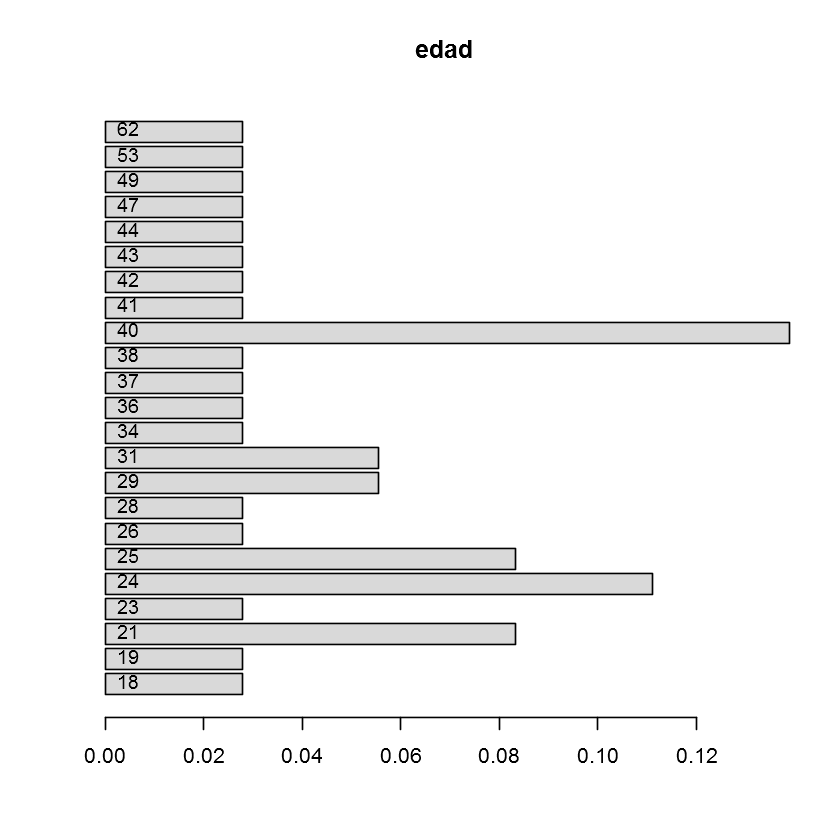

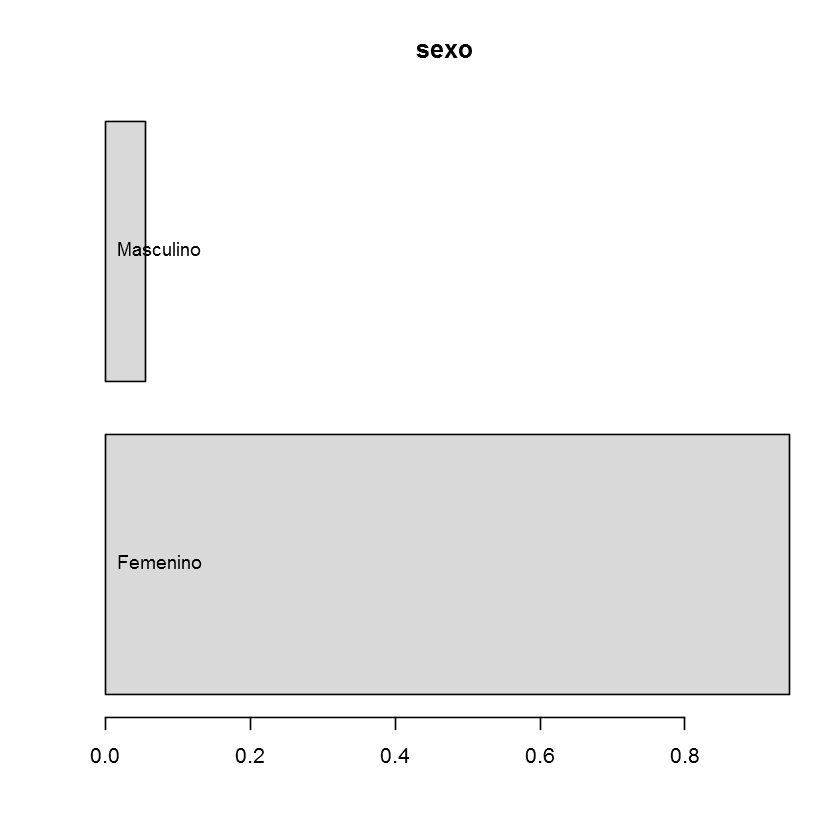

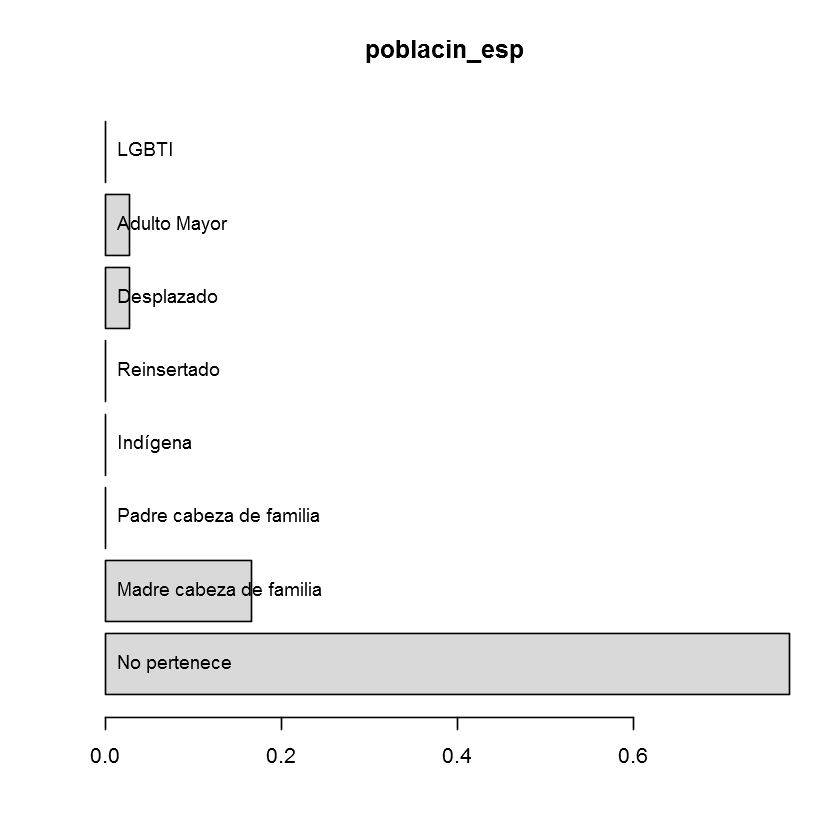

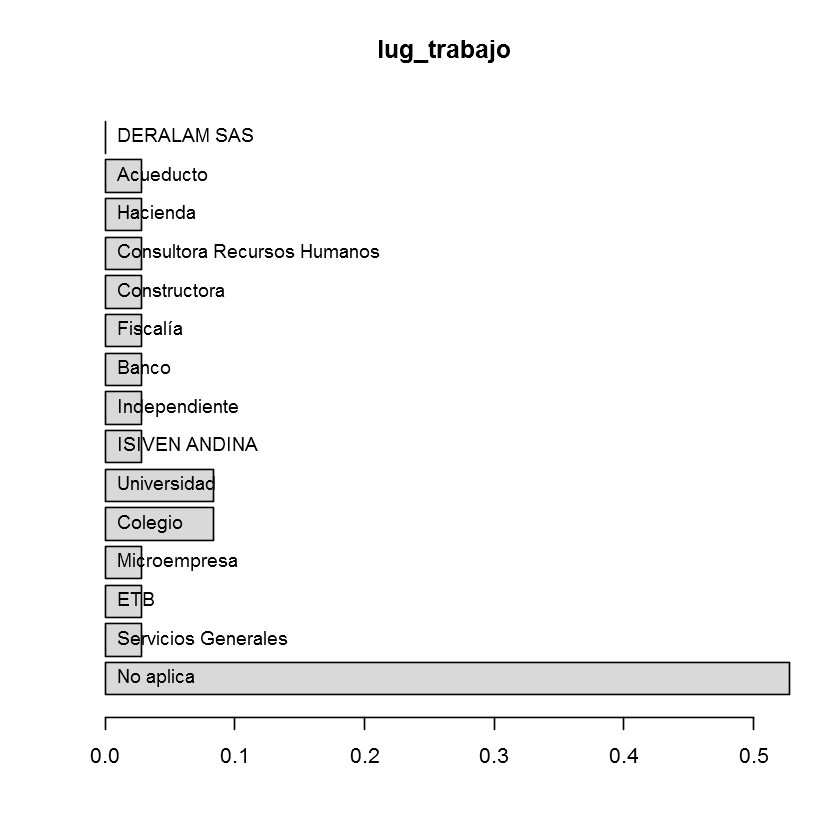

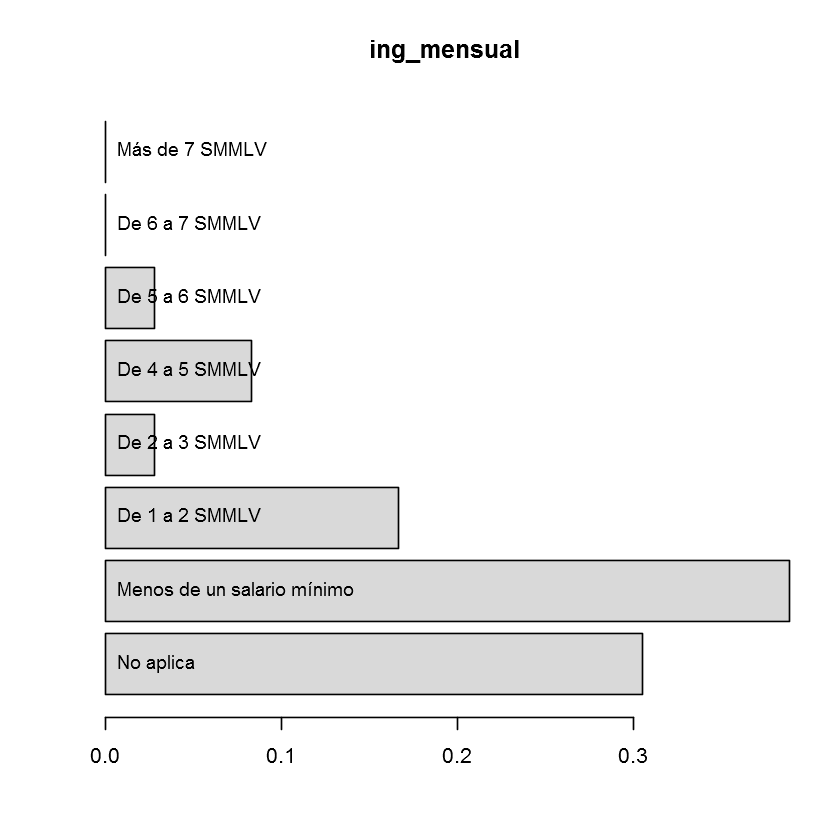

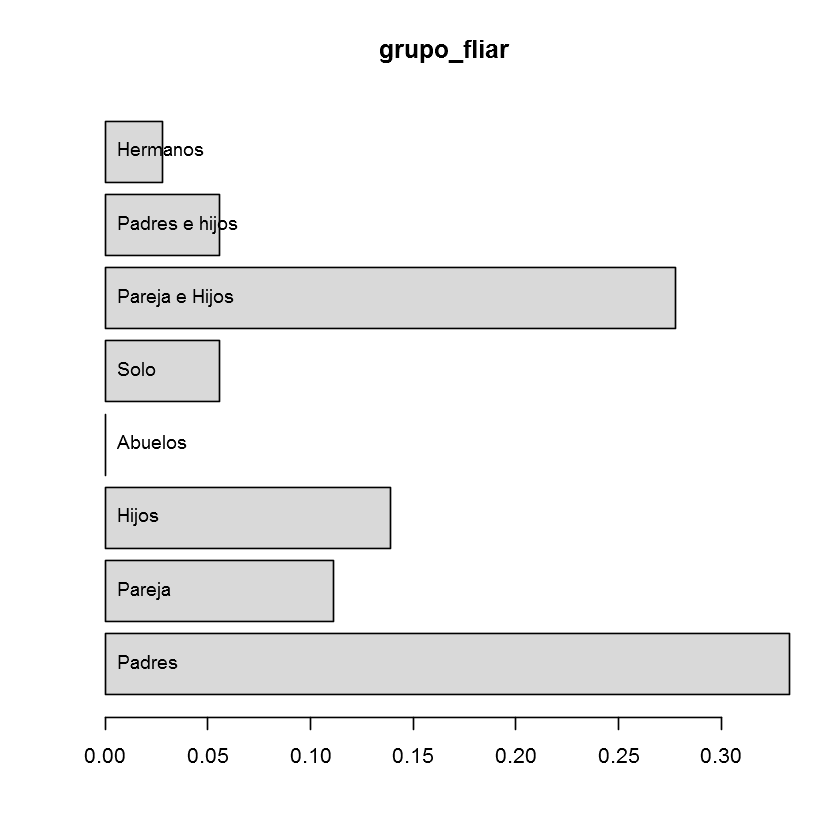

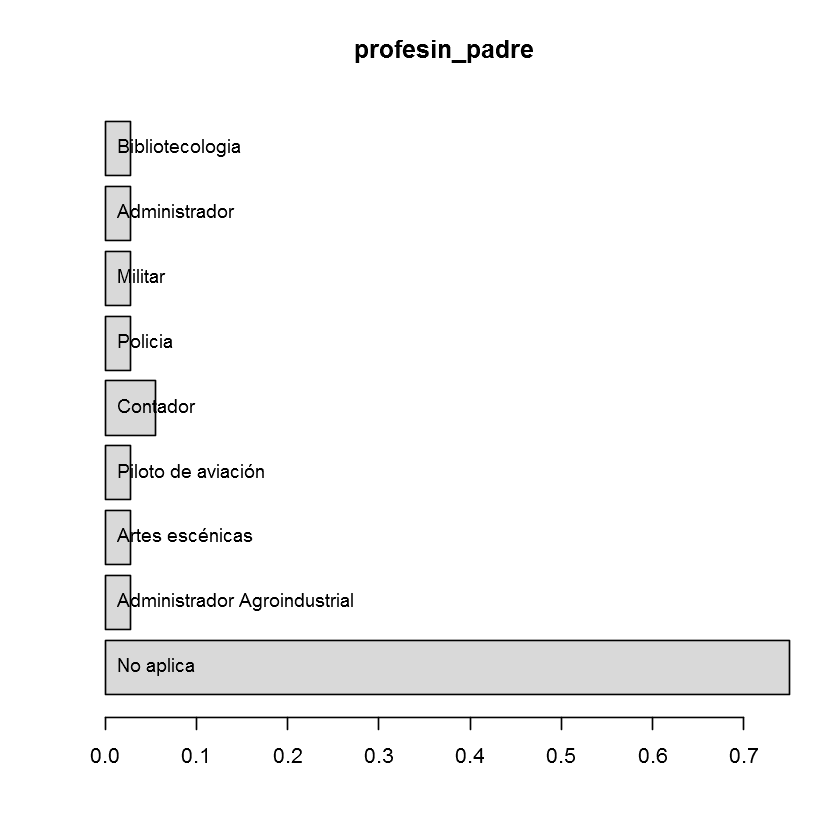

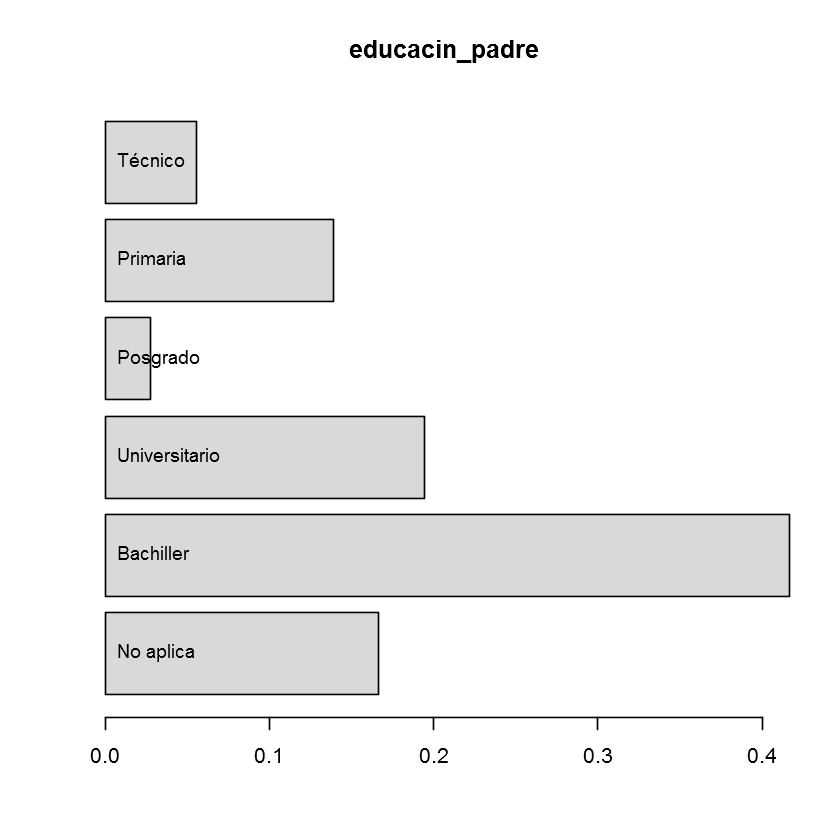

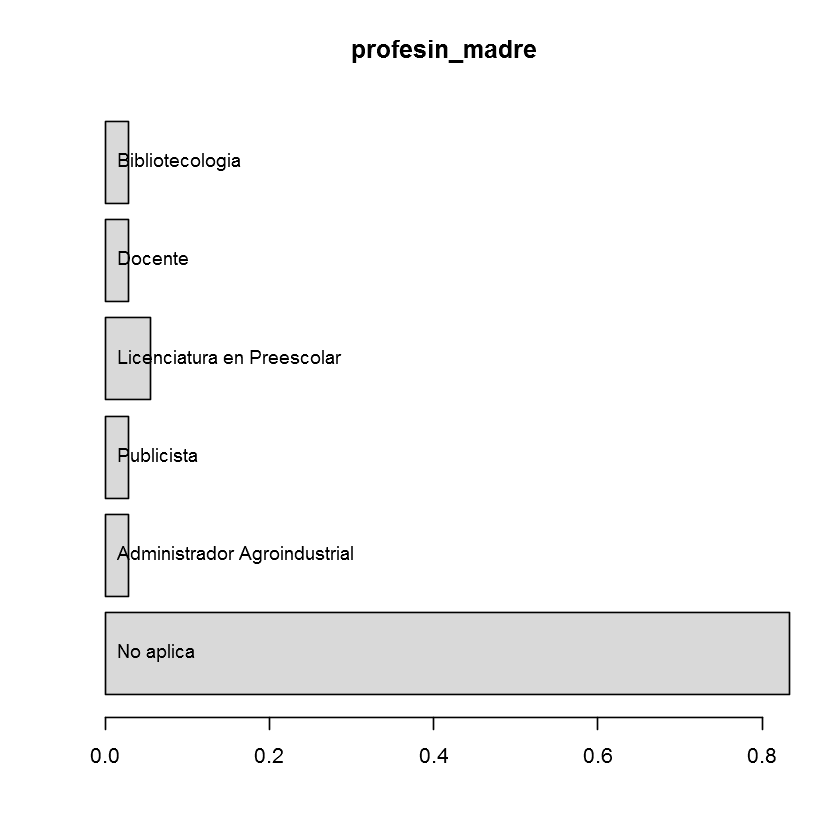

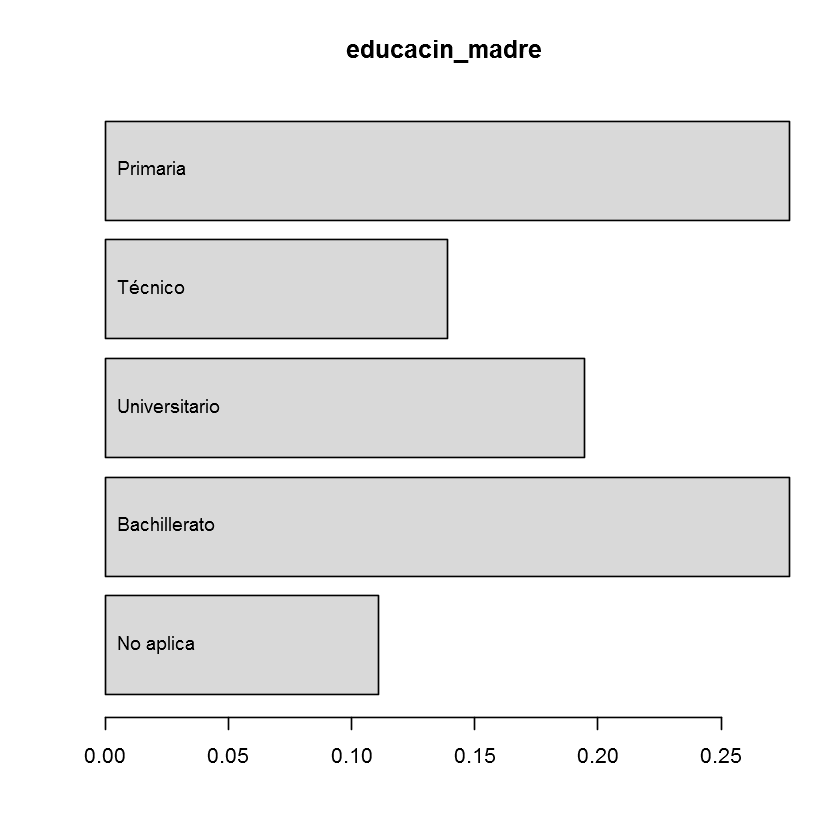

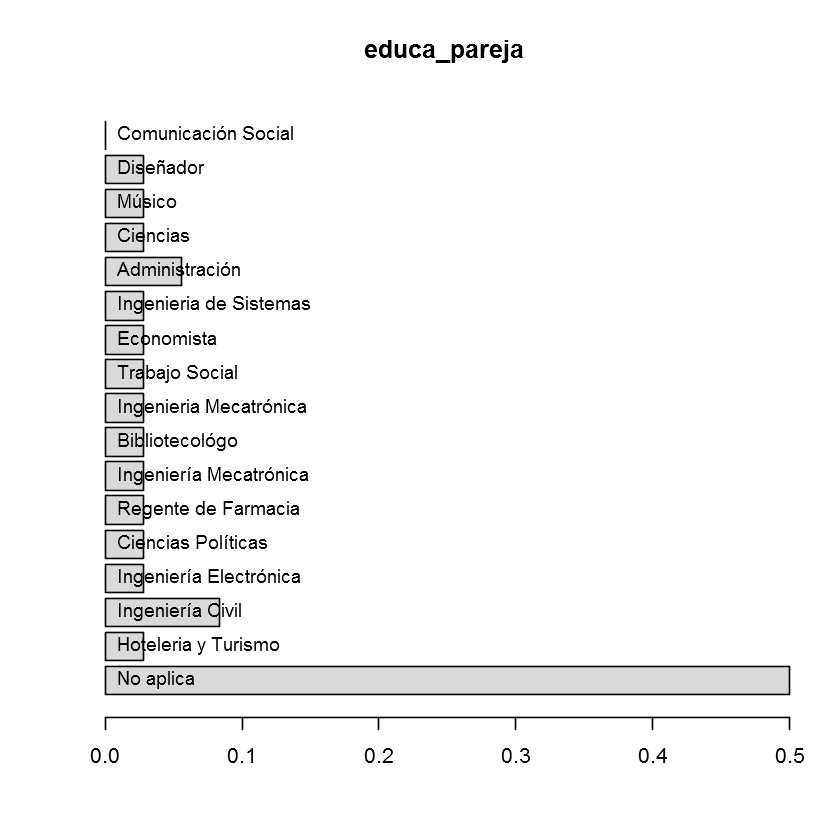

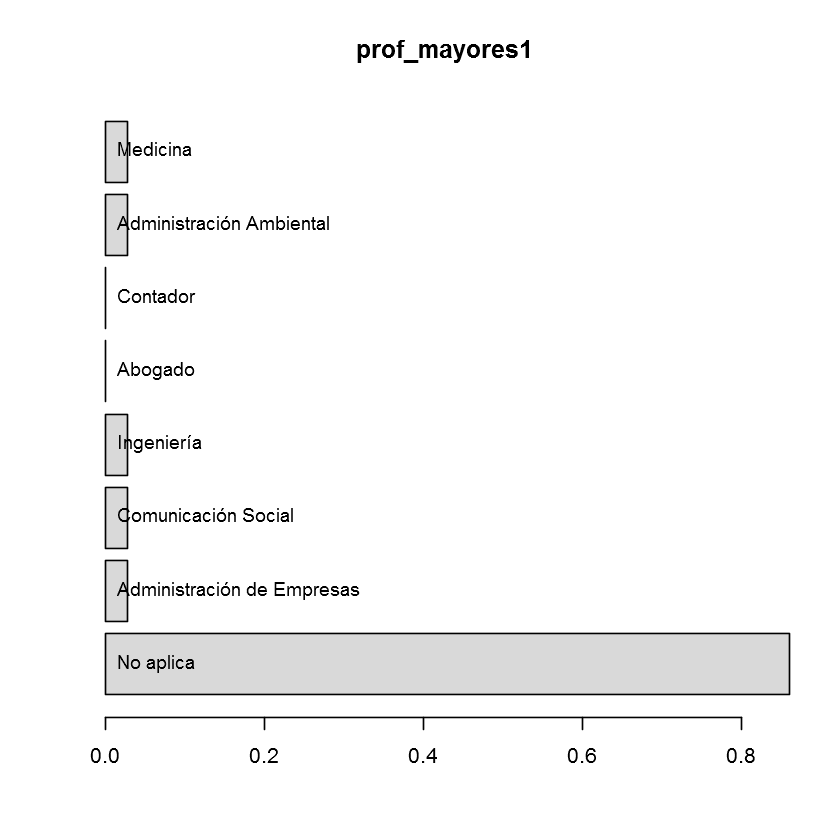

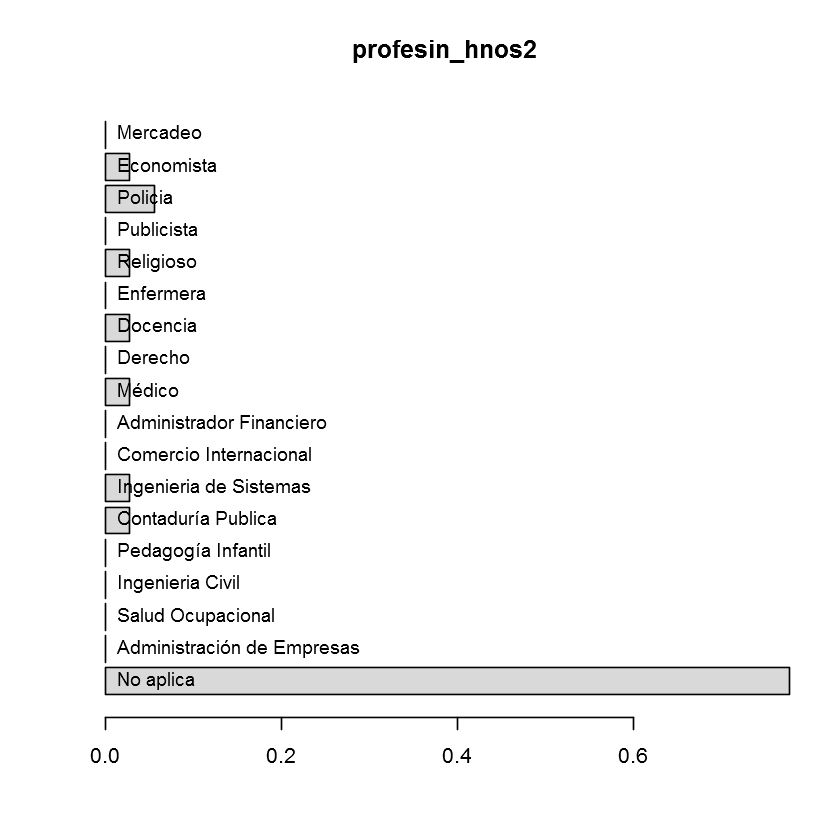

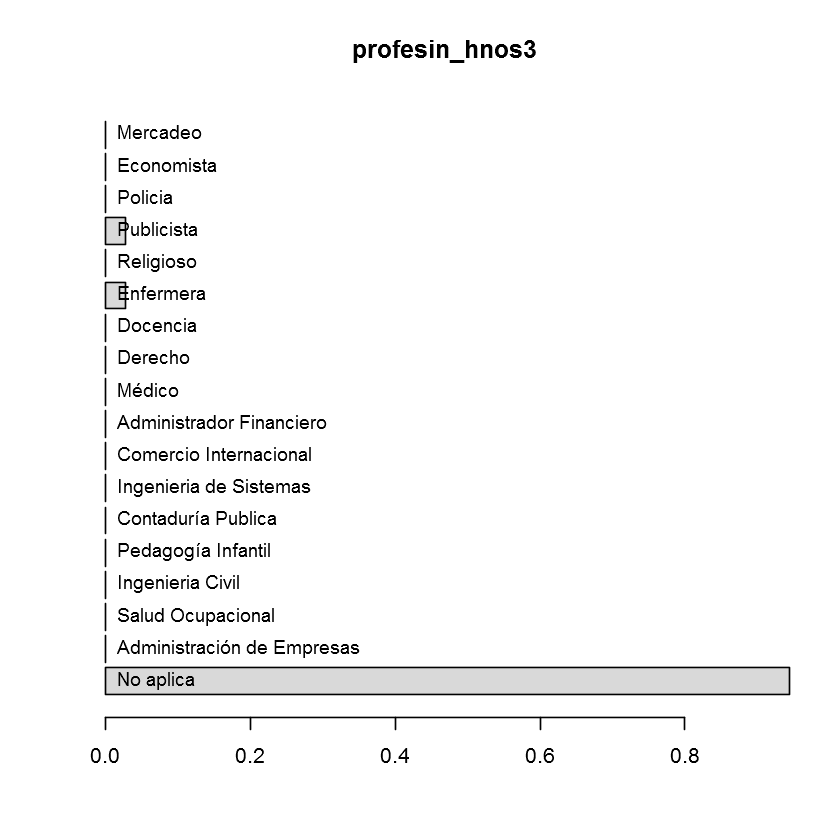

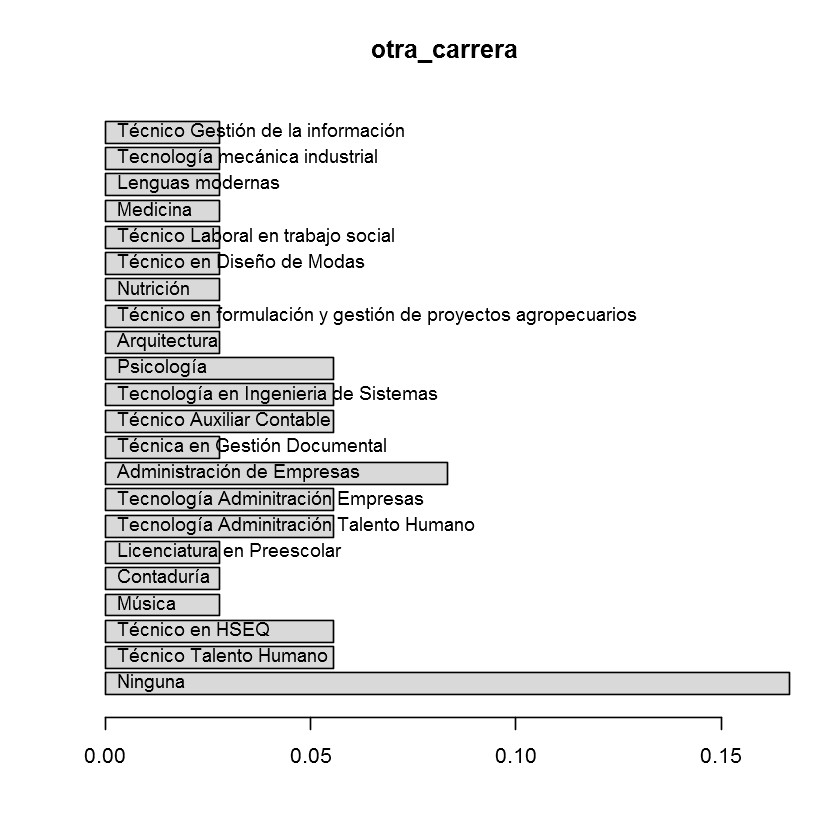

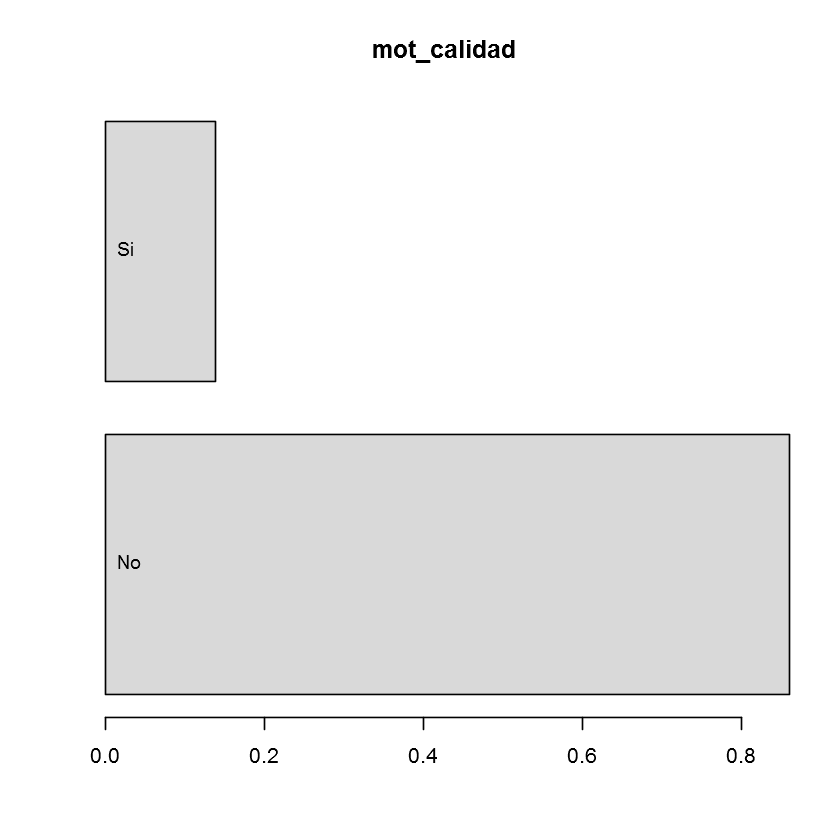

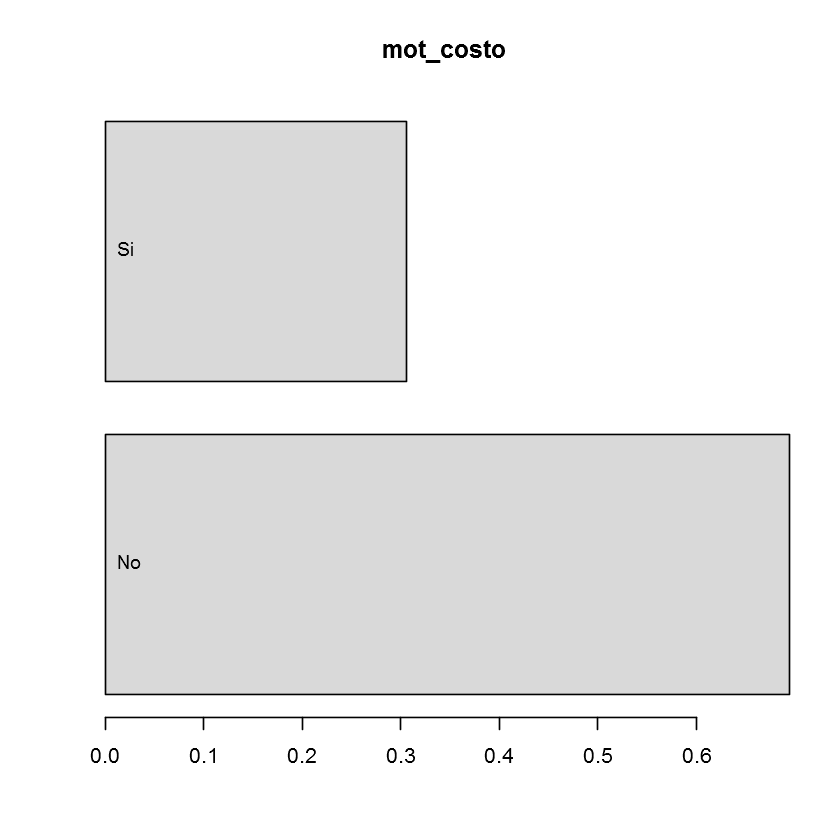

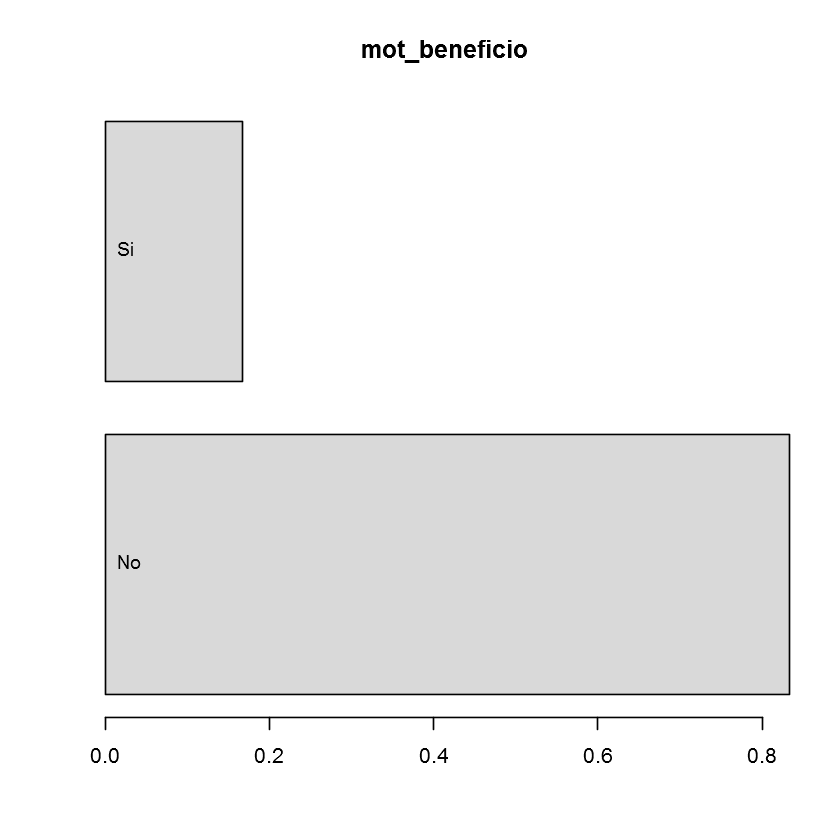

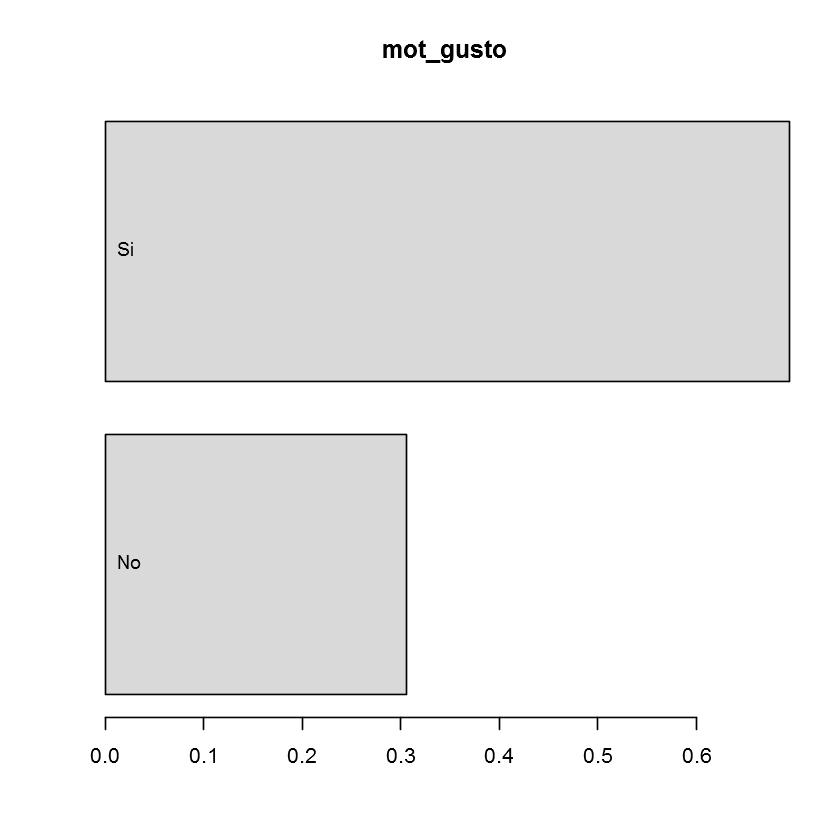

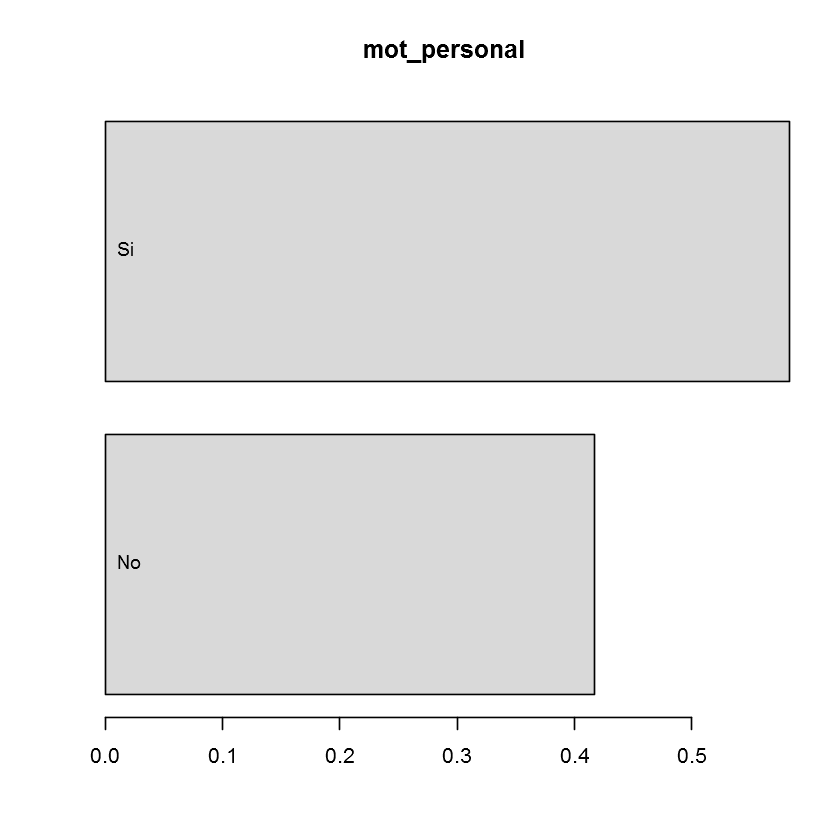

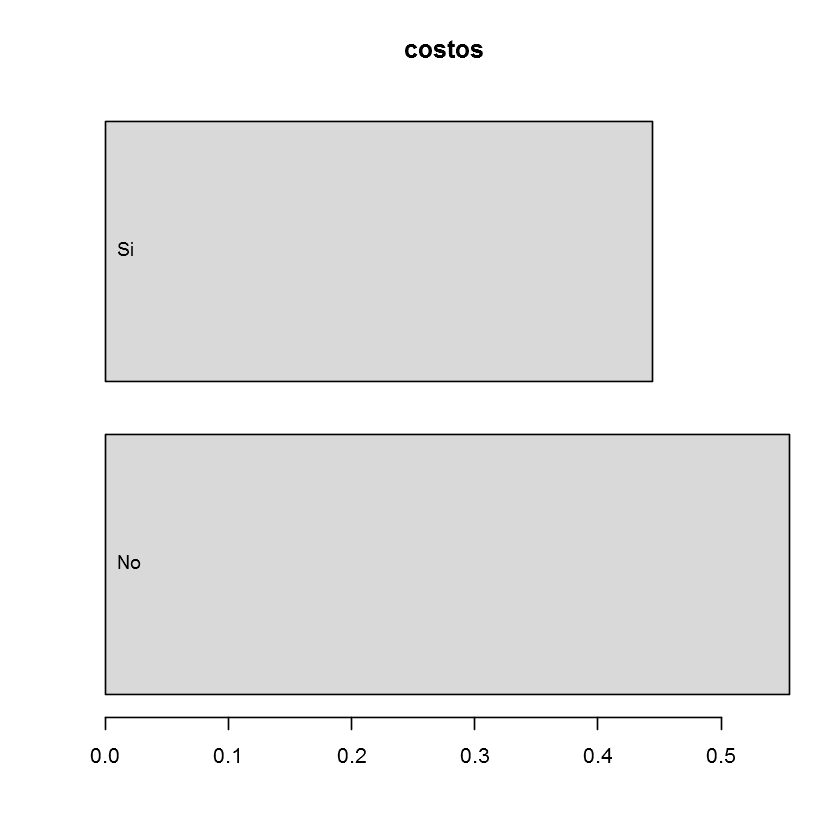

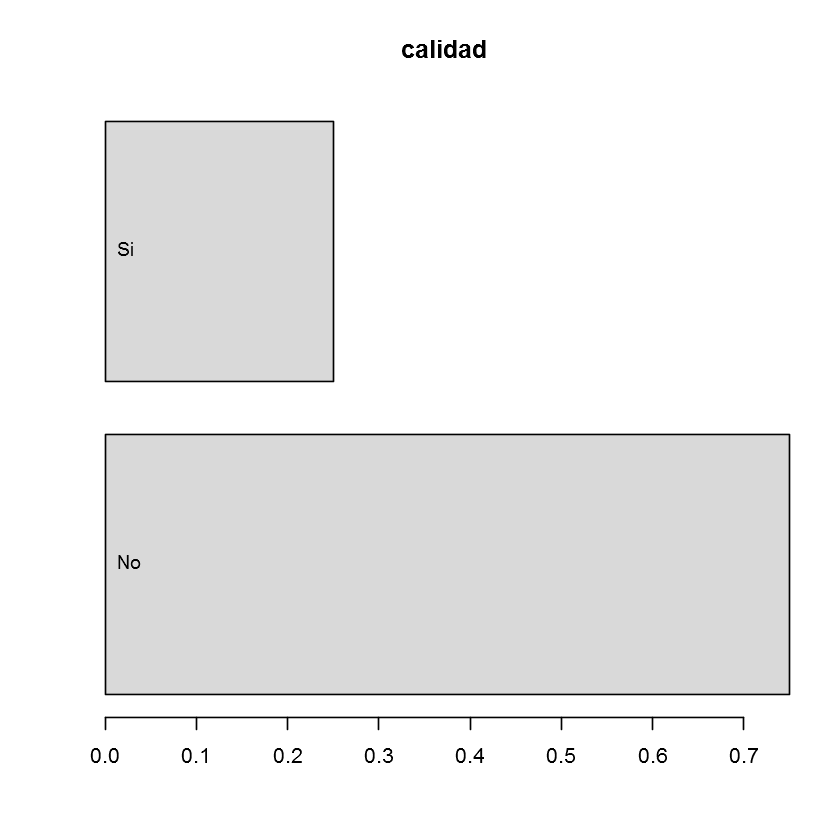

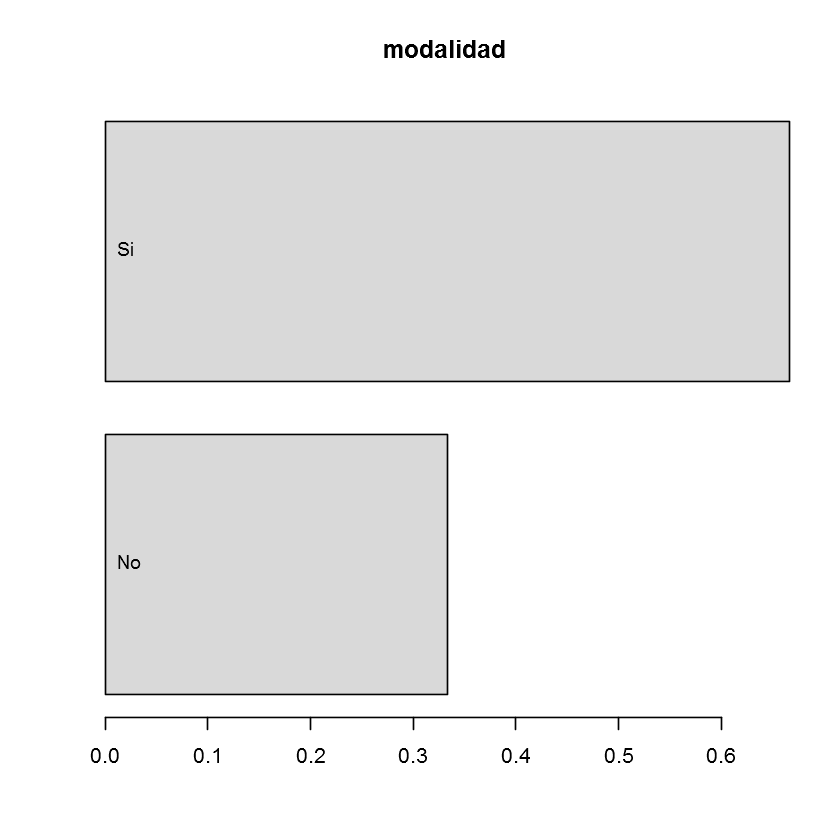

In [12]:
for (i in 1:ncol(test3)){
    datbl=prop.table(table(test3[,i]))
    #jpeg(file = paste("Barras variable_",i,"_",varnames[i],".jpeg",sep=""),width = 640, height = 640, units = "px", quality = 95)
    ba_pl=barplot(datbl,main=colnames(test3)[i],yaxt="n",horiz=T,col="gray85")
    text(0,ba_pl,rownames(datbl),pos=4, cex=0.9)#, srt=90)
    #dev.off()
    }

## Clustering
- dendograma con métdo de Ward

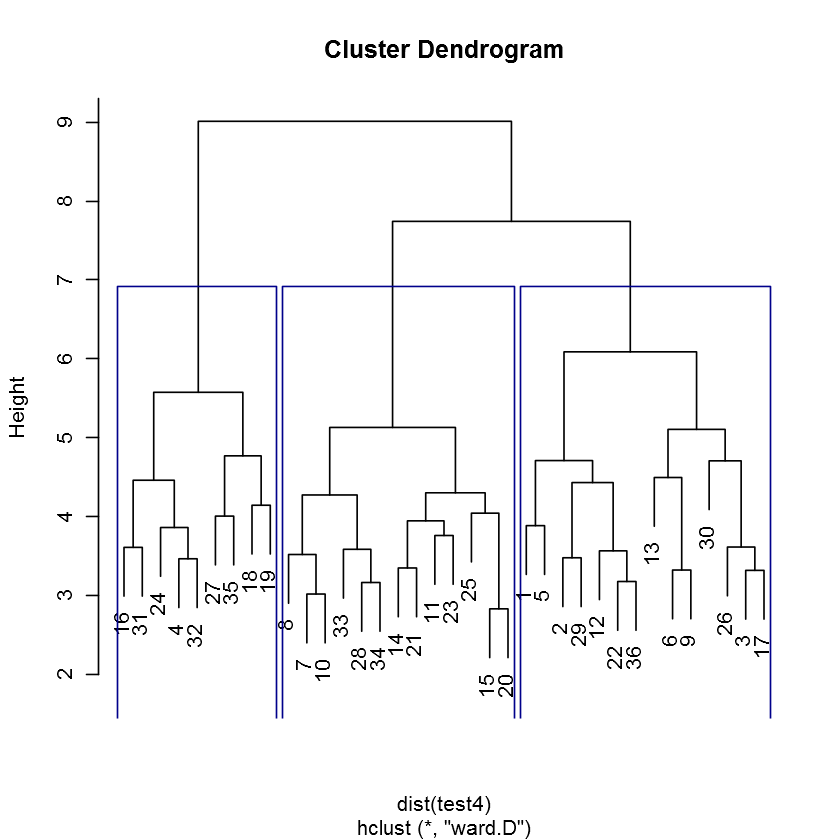

In [13]:
dend_test4=hclust(dist(test4),method="ward.D")

#jpeg(file = "dendrograma.jpeg",width = 640, height = 640, units = "px", quality = 95)
plot(dend_test4)#,hang=-1)
groups<- factor(cutree(dend_test4, k=k_groups) )
rect.hclust(dend_test4, k=k_groups, border="darkblue") 
#dev.off()

In [14]:
#(data.frame(groups))
(data.frame(table (groups)))

,groups,Freq
1,1,14
2,2,9
3,3,13


## Perfiles para las variables prioridad

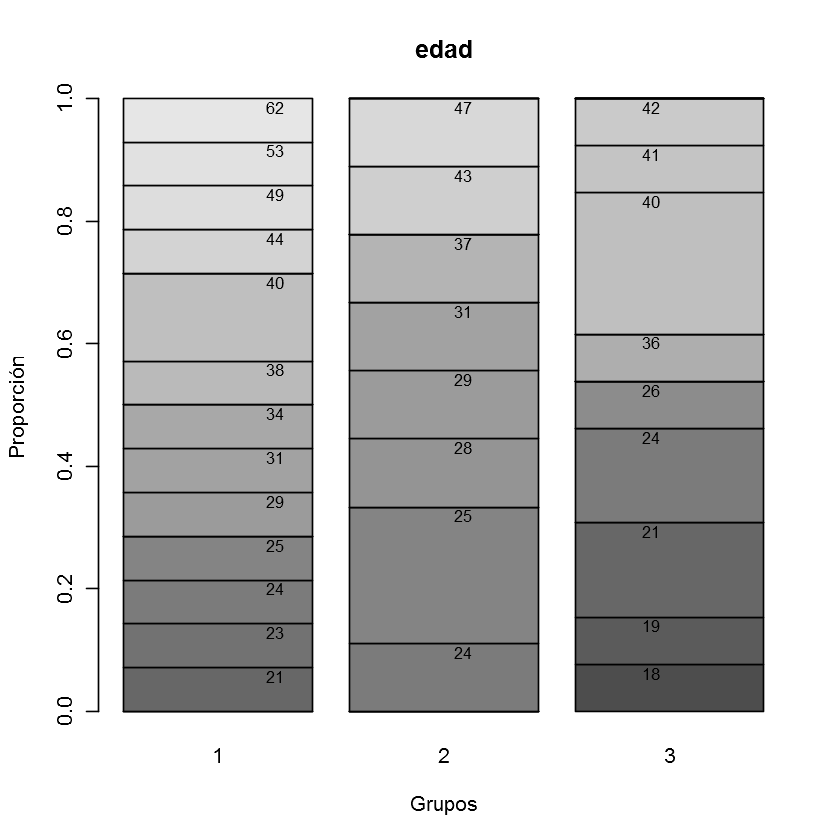

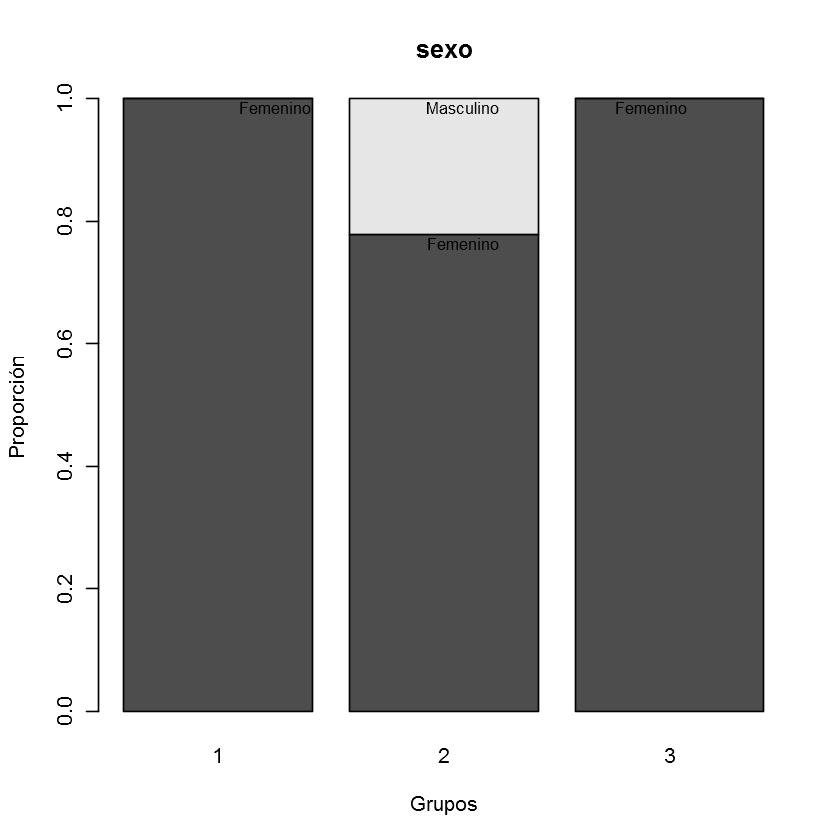

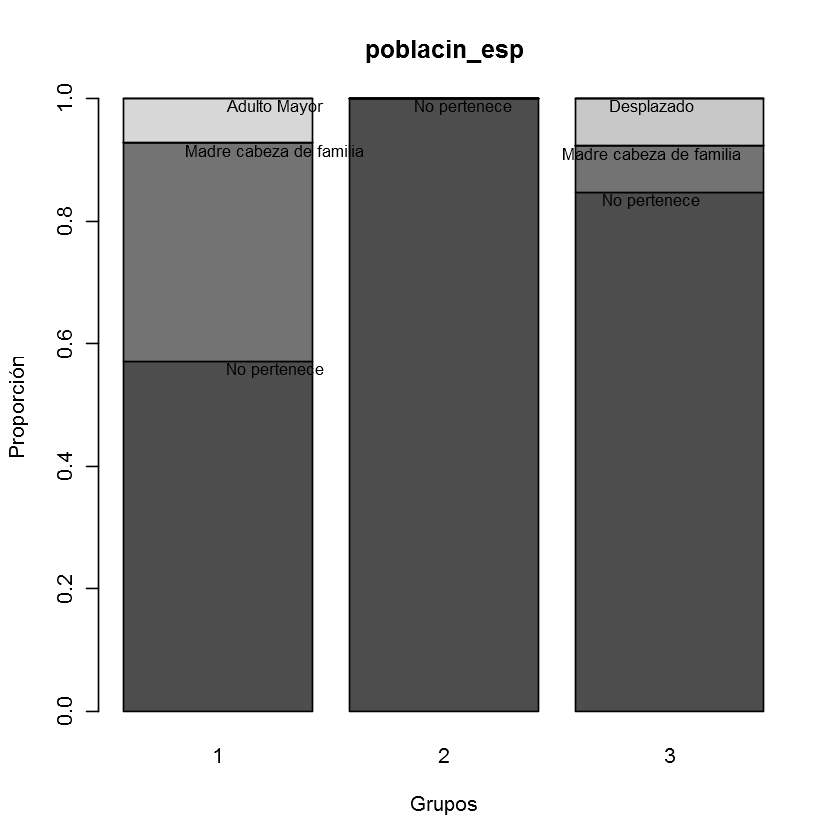

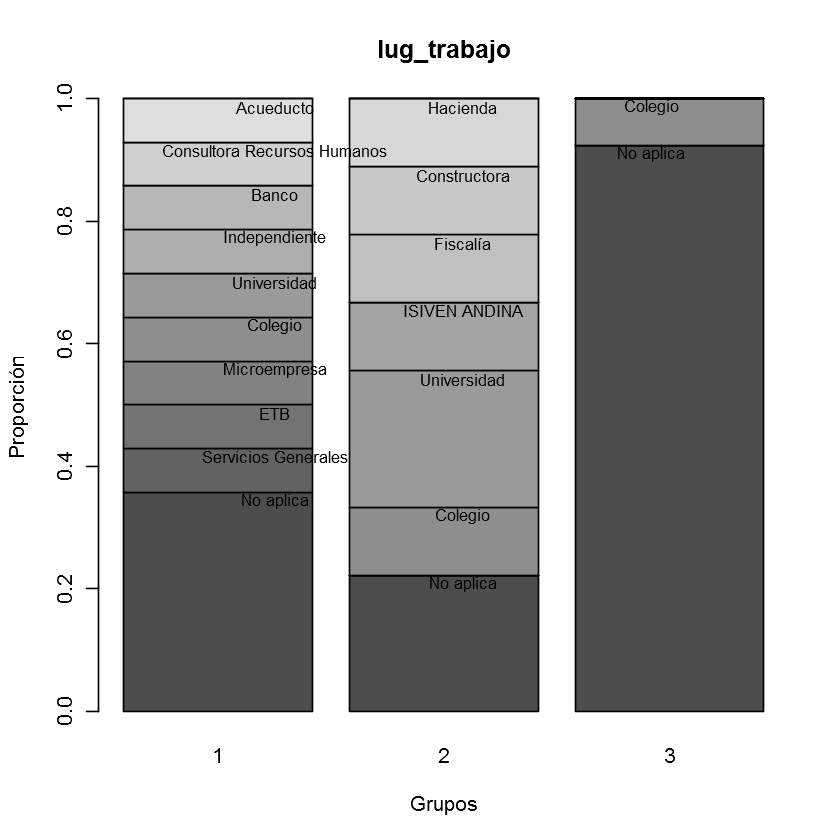

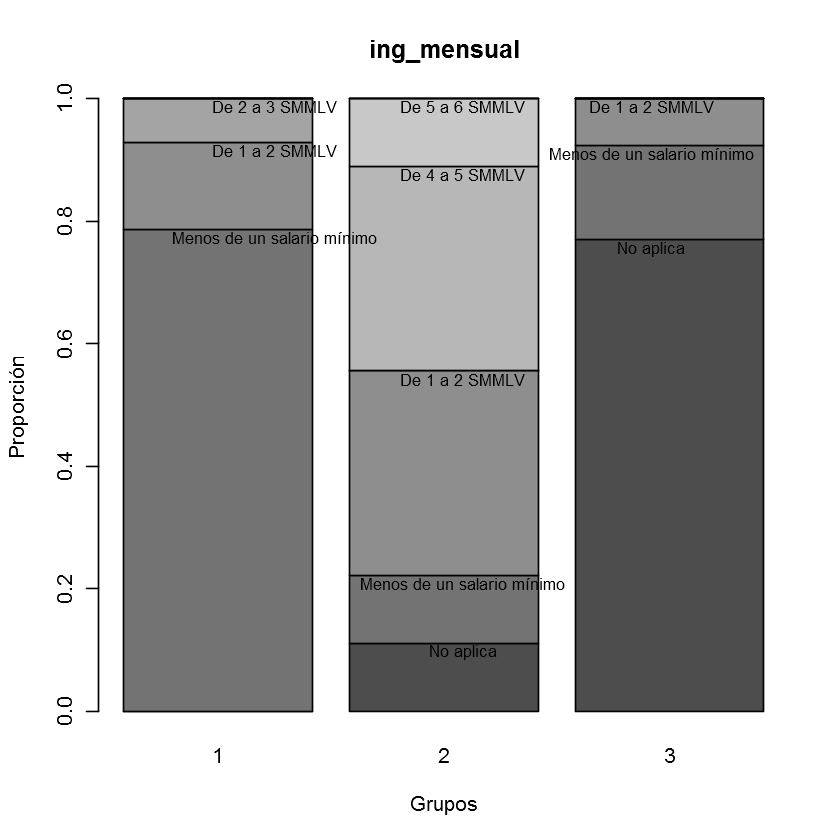

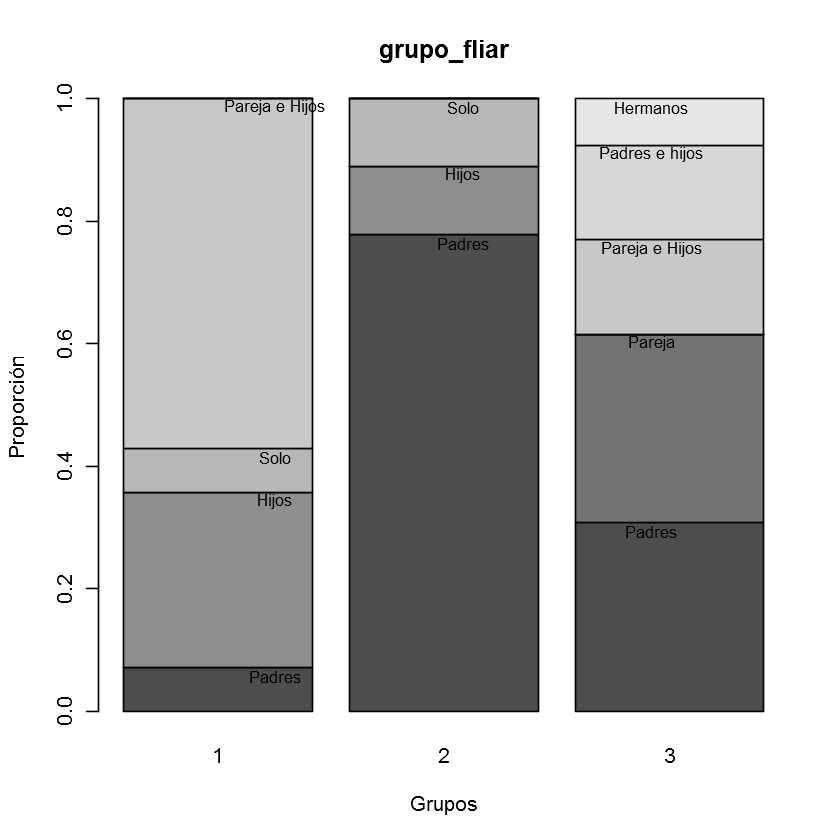

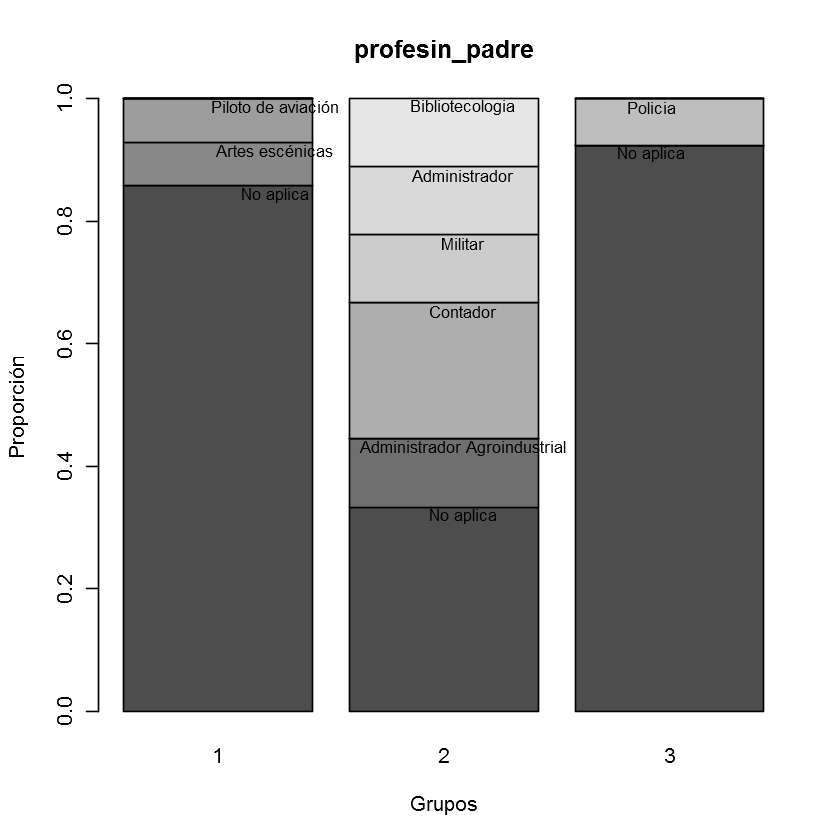

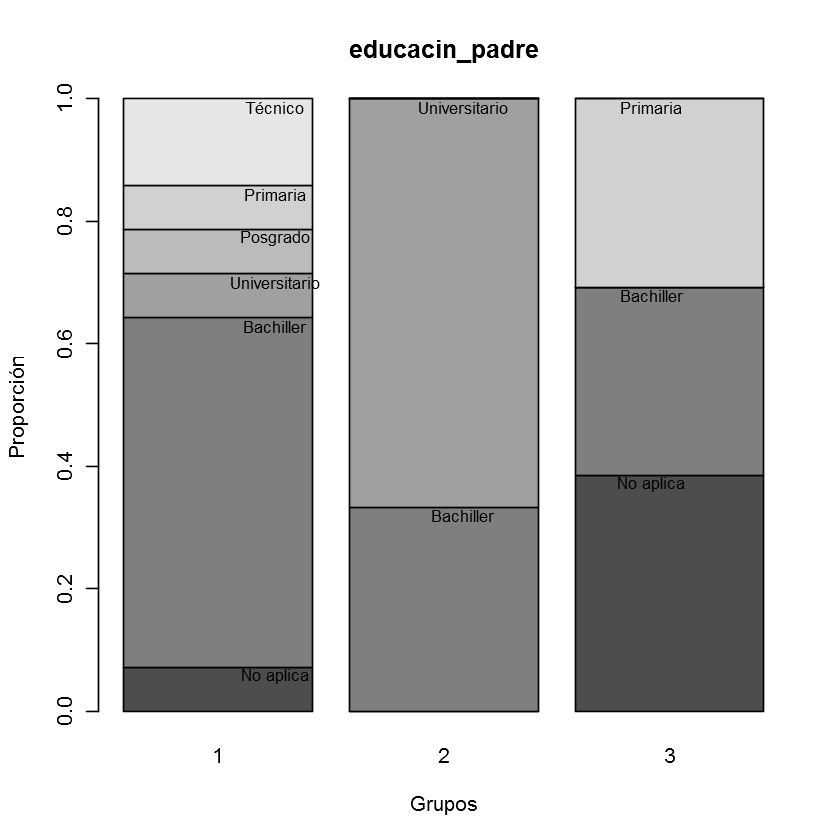

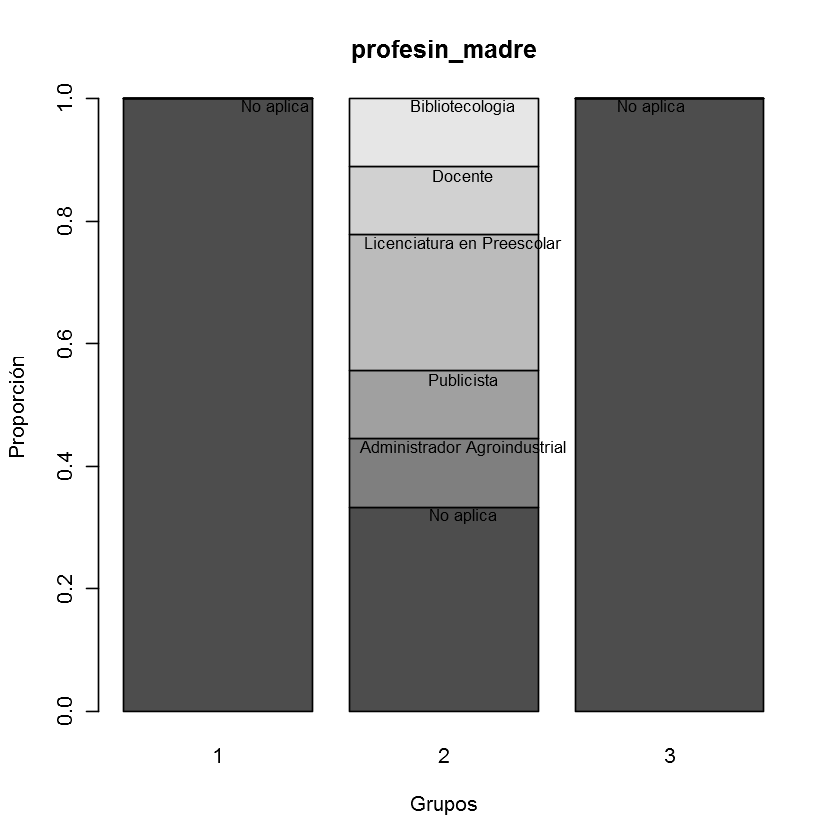

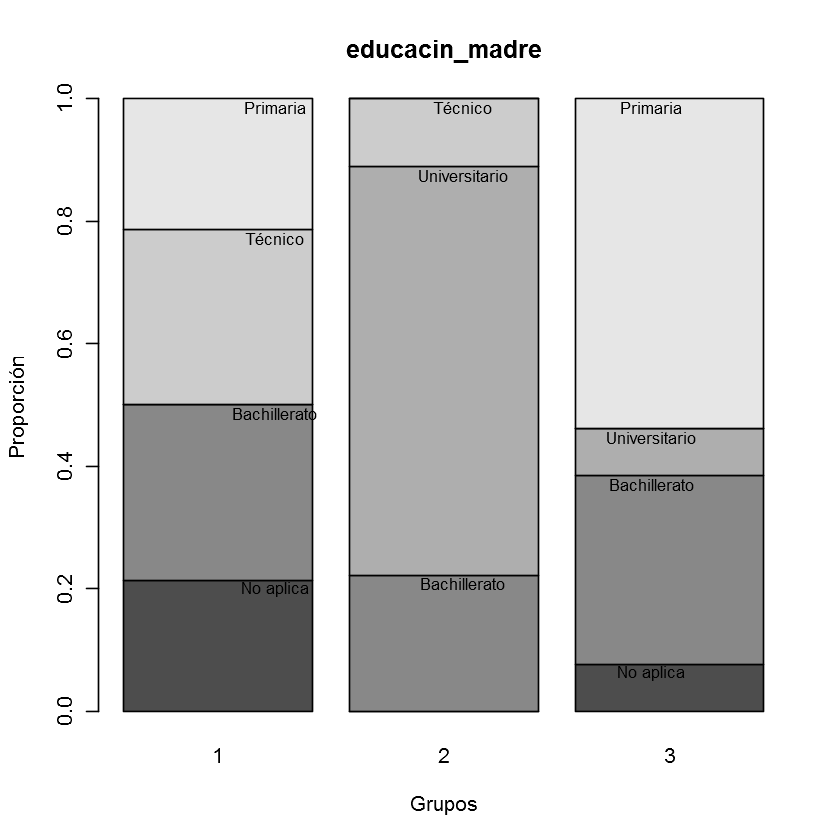

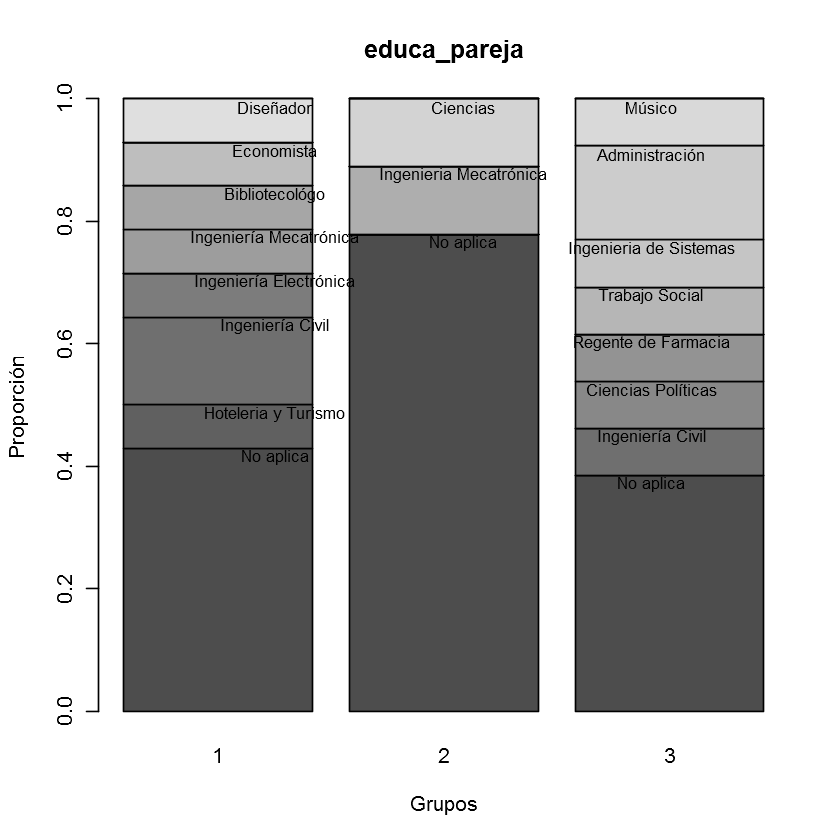

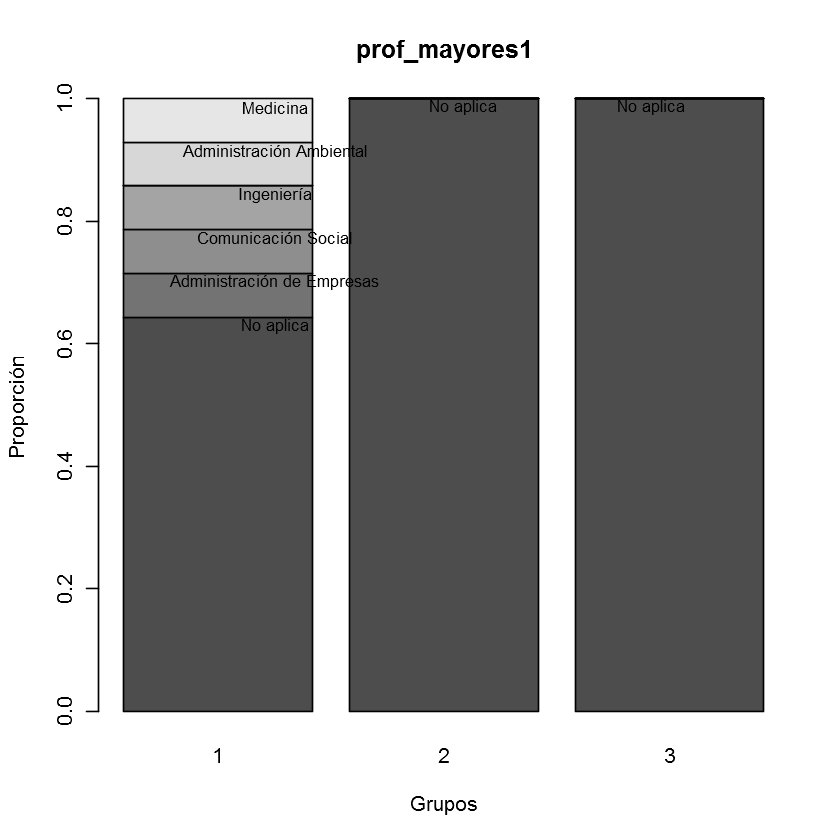

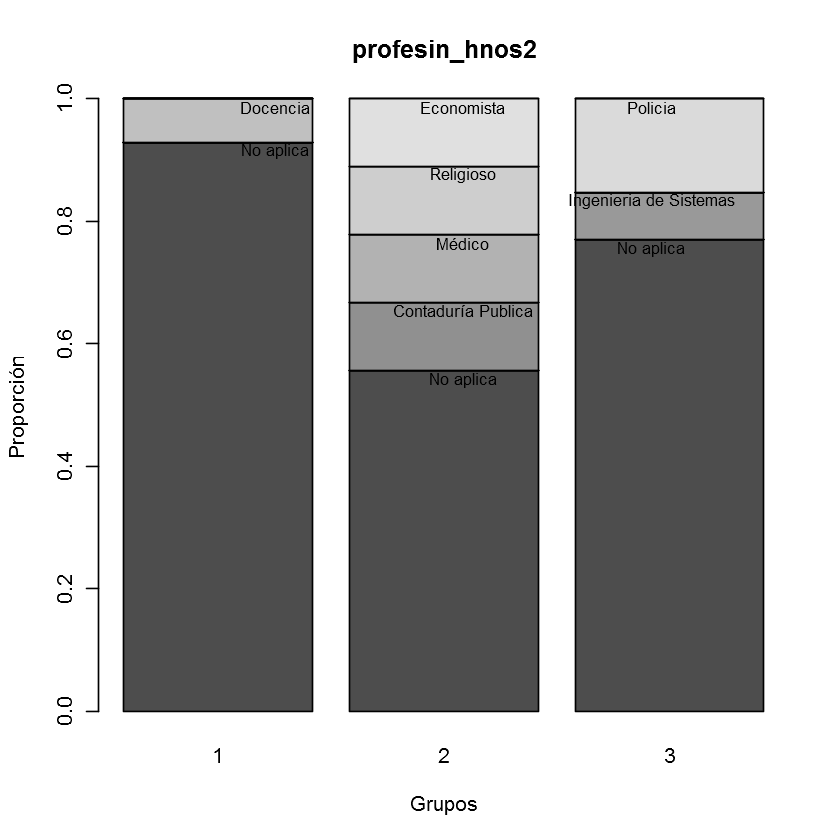

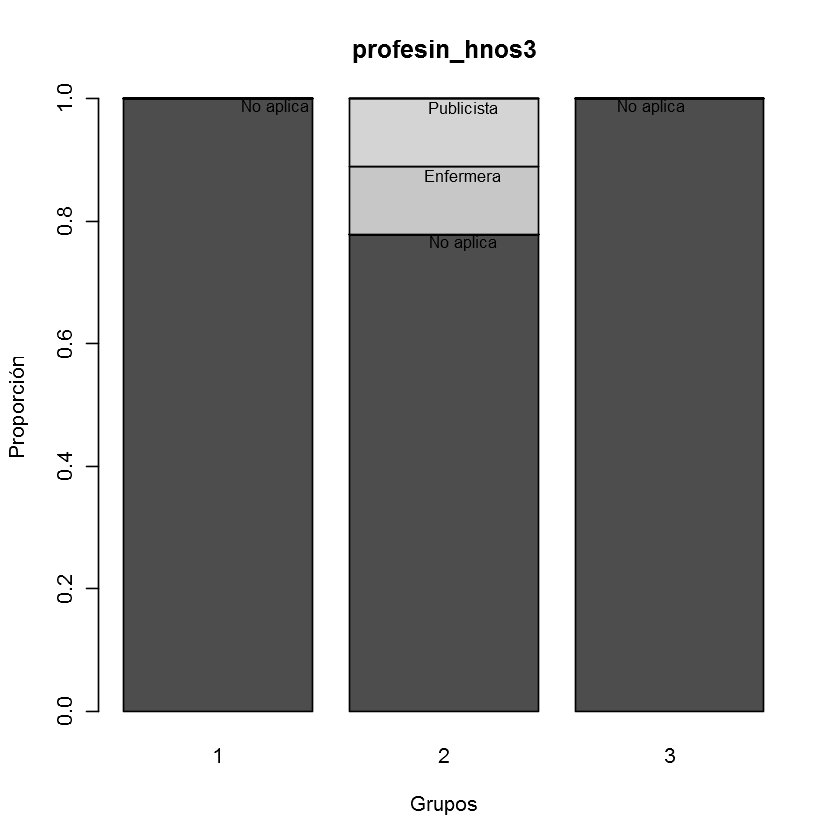

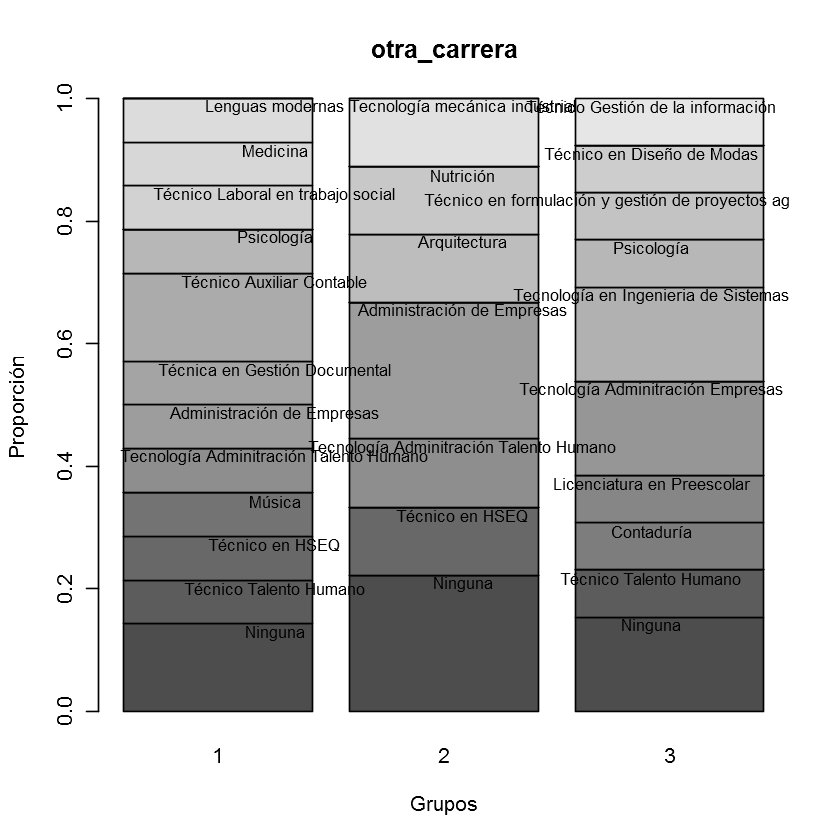

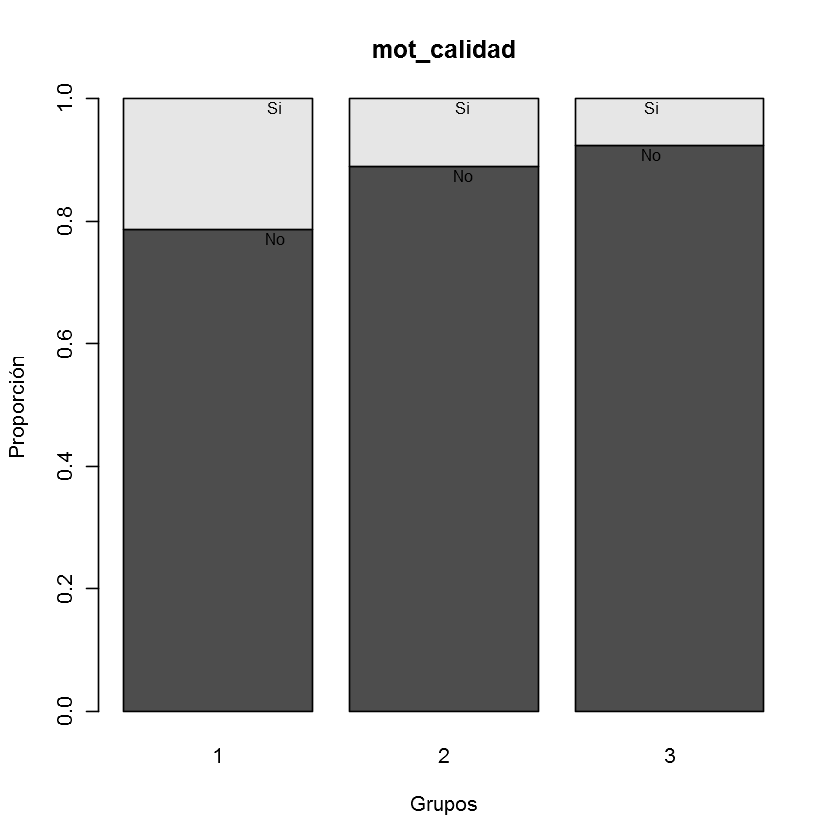

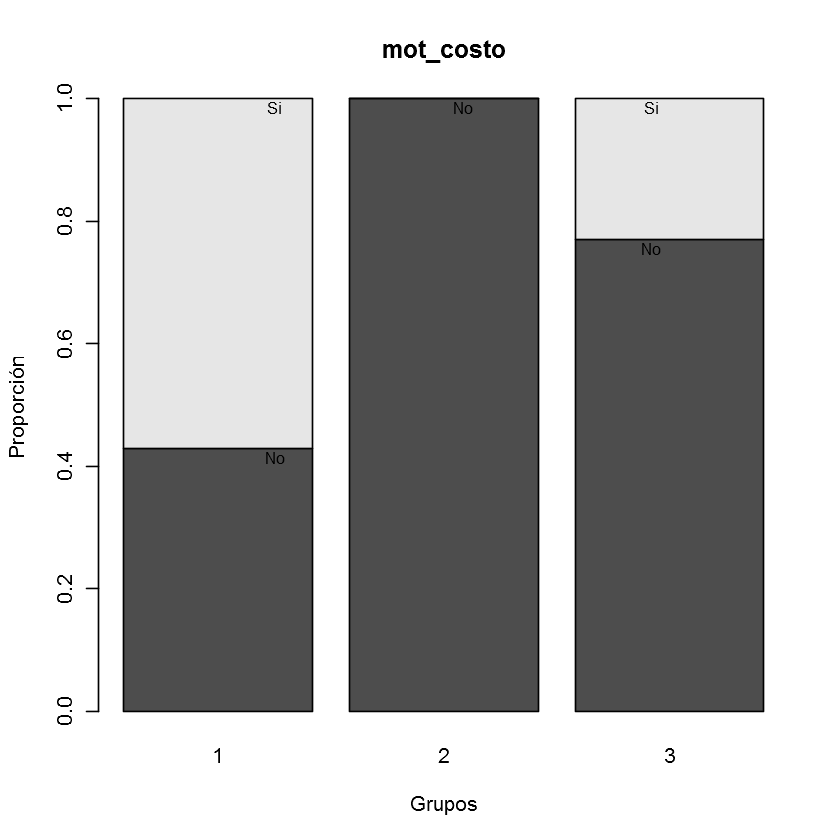

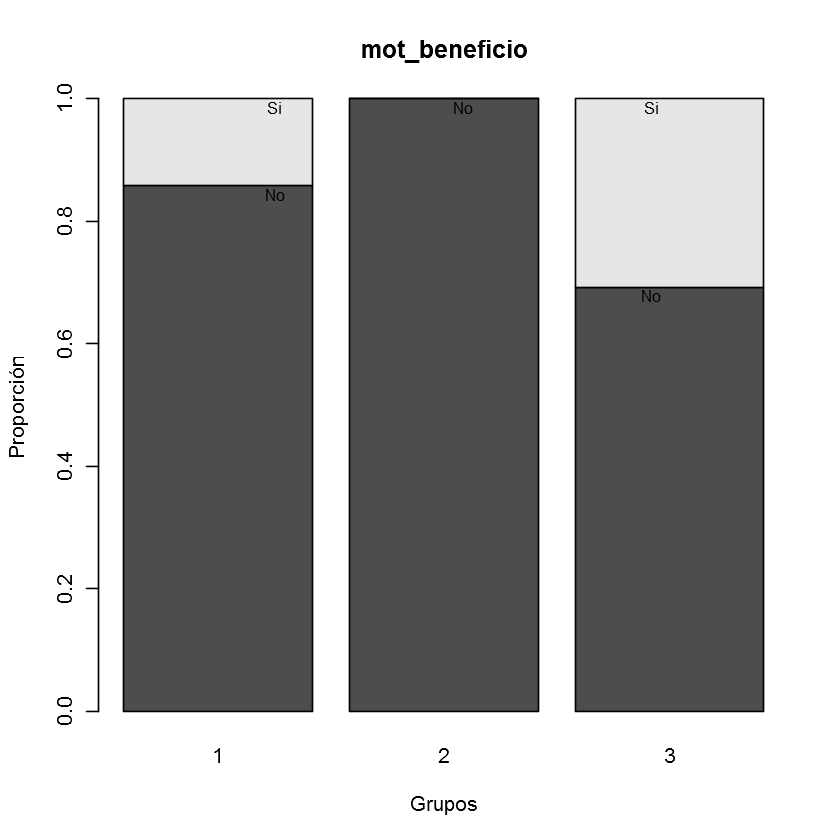

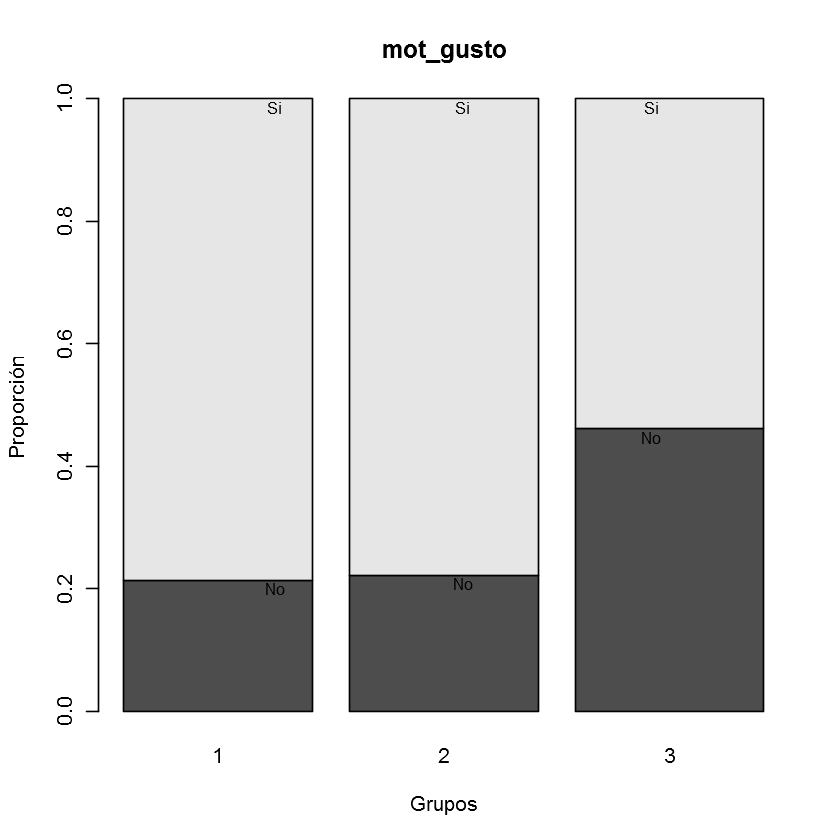

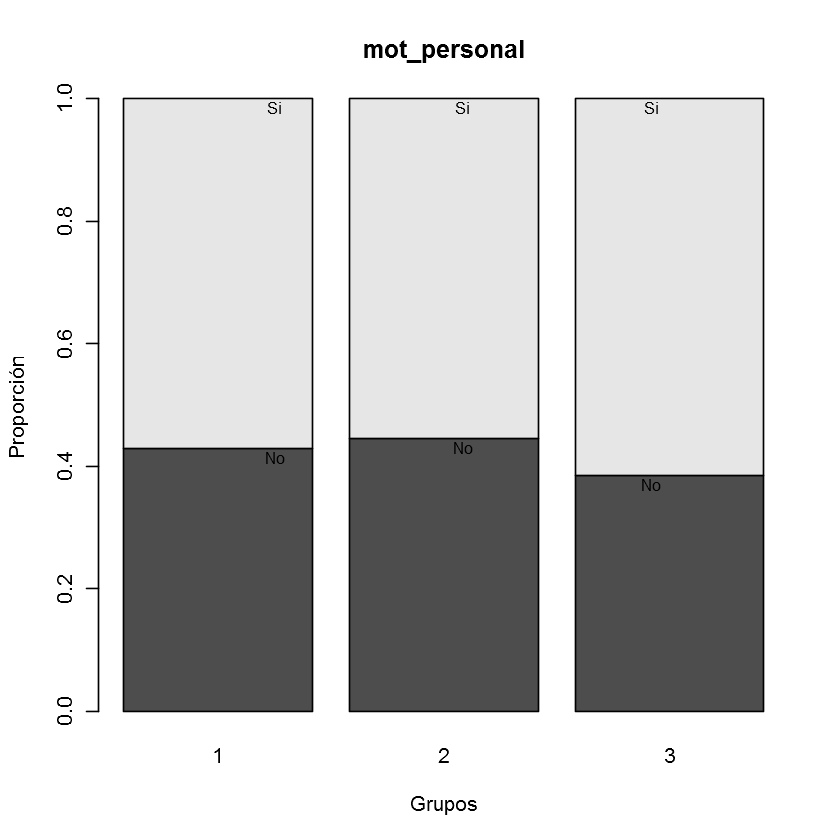

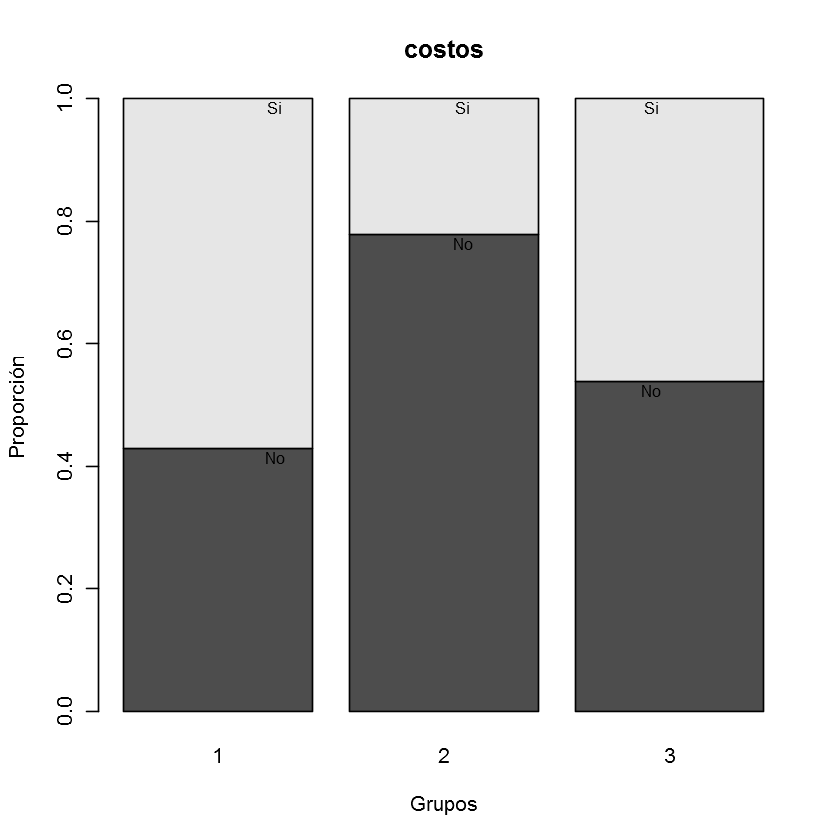

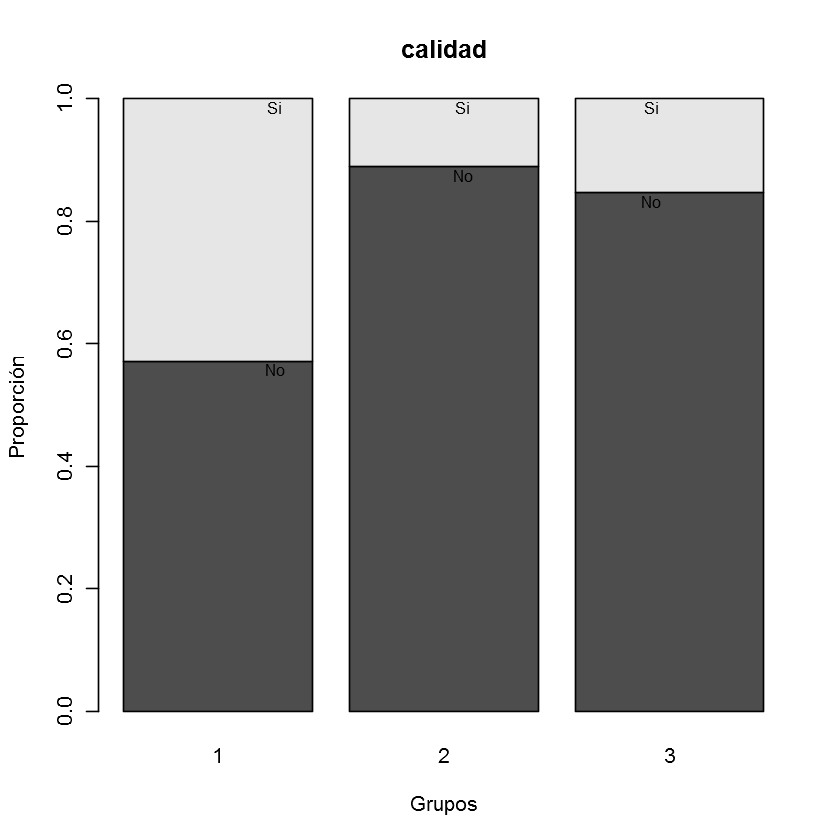

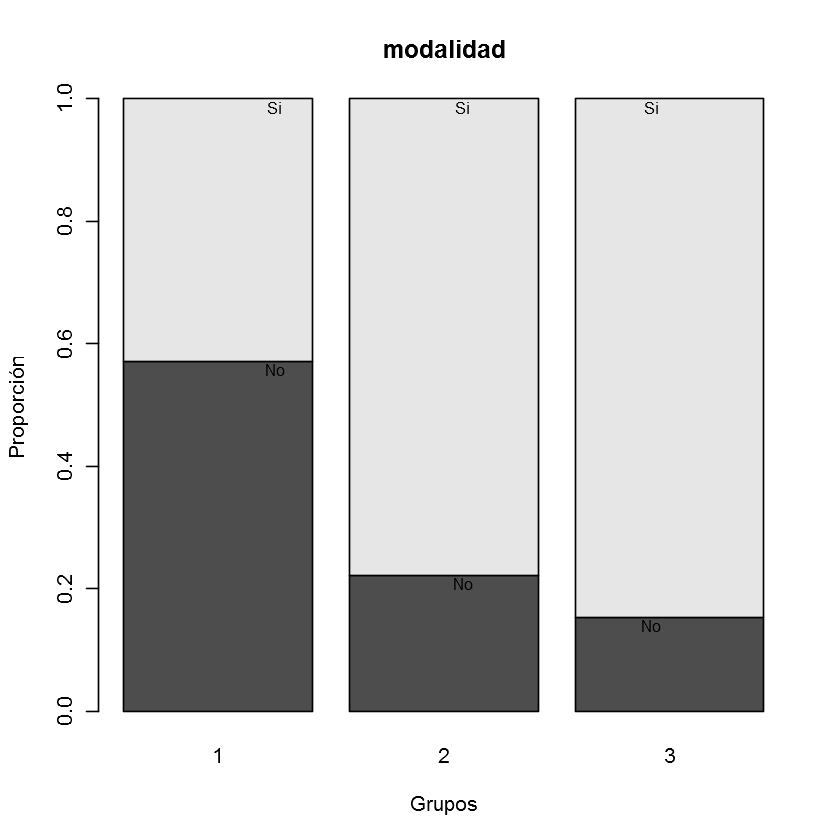

In [15]:
for (i in 1:ncol(test3)){
    data=test3[,i]
    data_table=prop.table(table(test3[,i],groups),2)
    #jpeg(file = paste("Gráfico variable_",i,"_",varnames[i],".jpeg",sep=""),width = 640, height = 640, units = "px", quality = 95)
    bp=barplot(data_table,main=colnames(test3)[i],xlab="Grupos",ylab="Proporción")
    for (clust in 1:length(unique(groups))){
        yval=0
        for (dat in 1:nrow(data_table)){
            if (data_table[dat,clust]>0){
                yval=yval+data_table[dat,clust]
                #print(c(clust,yval))
                text(clust,yval-0.015,rownames(data_table)[dat], cex=0.8)
            }
        }
    }
    #dev.off()
}
#summary(test1)

### Utilizar arboles de decisión para visualizar la variable más discriminativa

[1] "edad"           "sexo"           "poblacin_esp"   "lug_trabajo"   
 [5] "ing_mensual"    "grupo_fliar"    "profesin_padre" "educacin_padre"
 [9] "profesin_madre" "educacin_madre" "educa_pareja"   "prof_mayores1" 
[13] "profesin_hnos2" "profesin_hnos3" "otra_carrera"   "mot_calidad"   
[17] "mot_costo"      "mot_beneficio"  "mot_gusto"      "mot_personal"  
[21] "costos"         "calidad"        "modalidad"      "groups"

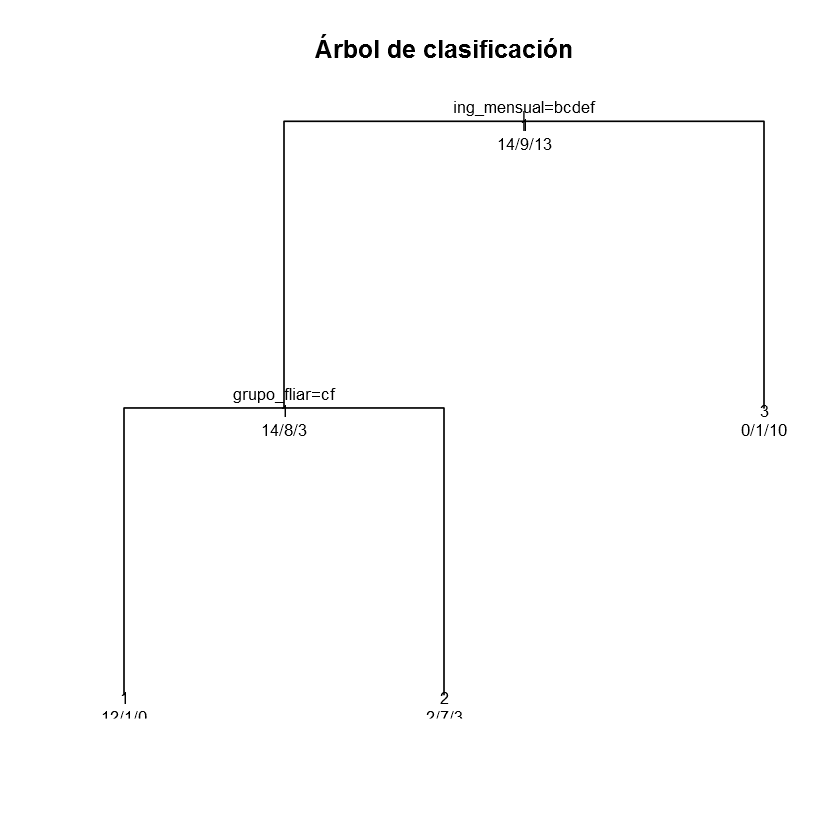

In [16]:
test6=NULL
test6=cbind(test3,groups)
colnames(test6)
tree6_fit = rpart(groups~edad+sexo+poblacin_esp+lug_trabajo+ing_mensual+grupo_fliar+profesin_padre+educacin_padre+profesin_madre+educacin_madre+educa_pareja+prof_mayores1+profesin_hnos2+profesin_hnos3+otra_carrera+mot_calidad+mot_costo+mot_beneficio+mot_gusto+mot_personal+costos+calidad+modalidad,
                  method="class", data=test6)

#jpeg(file = "Arbol_casif.jpeg",width = 640, height = 640, units = "px", quality = 95)
plot(tree6_fit, uniform=TRUE,main="Árbol de clasificación")
text(tree6_fit, use.n=TRUE, all=TRUE, cex=.8) 
#dev.off()

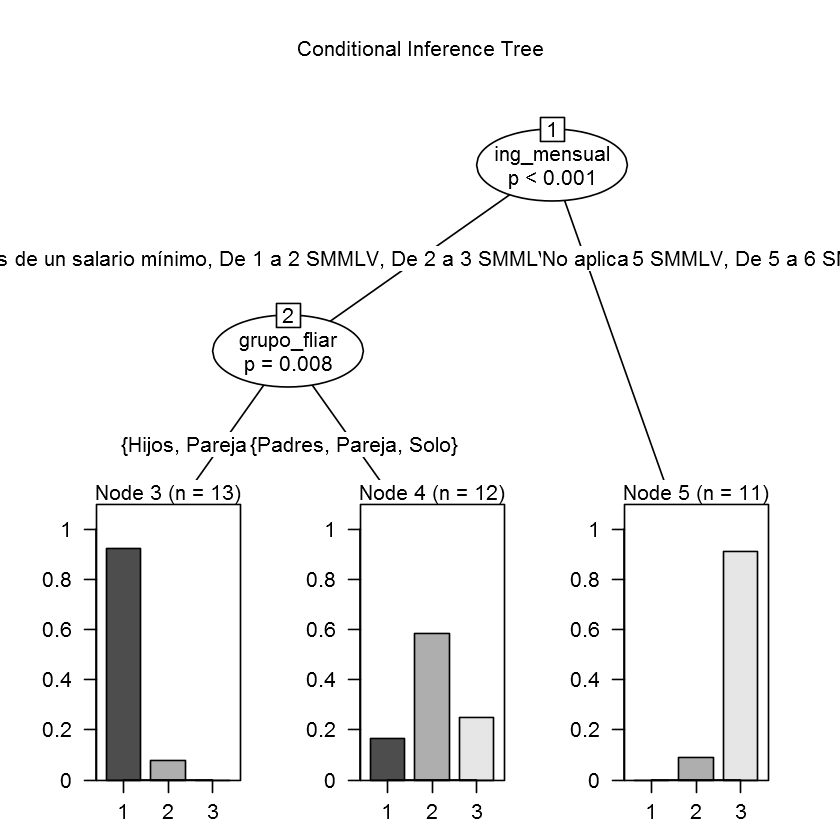

In [17]:
ct = ctree(groups~edad+sexo+poblacin_esp+lug_trabajo+ing_mensual+grupo_fliar+profesin_padre+educacin_padre+profesin_madre+educacin_madre+educa_pareja+prof_mayores1+profesin_hnos2+profesin_hnos3+otra_carrera+mot_calidad+mot_costo+mot_beneficio+mot_gusto+mot_personal+costos+calidad+modalidad,
            data = test6)

#jpeg(file = "Arbol_casif2.jpeg",width = 640, height = 640, units = "px", quality = 95)
plot(ct, main="Conditional Inference Tree")
#dev.off()
 
# #Table of prediction errors
# table(predict(ct), test6$groups)
 
# # Estimated class probabilities
# predict(ct, newdata=test6, type="prob")